In [39]:
import function as f
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
interval_10_df = pd.read_csv('interval_10.csv')
interval_10_df.head(), interval_10_df.shape

(    Truck_id  Completion_Time                                 file_name  \
 0    Truck-8          347.064  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 1    Truck-4          350.488  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 2  Truck-109          341.800   now_RoutePoints_10_LP_0_0_100_10rep.csv   
 3    Truck-6          354.504  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 4    Truck-2          355.472  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 
    Route_id  dist  delay_count  Completion_Time_alone  Congestion_rate  YT_Num  
 0         8    19            4             349.700683        -0.007540      20  
 1         4    21            5             354.400933        -0.011041      20  
 2       109    15            2             340.010595         0.005263      20  
 3         6    25            3             356.660800        -0.006047      20  
 4         2    21            5             354.400933         0.003022      20  ,
 (122385, 9))

In [41]:
# Select Congestion rate is greater than 0
interval_10_df = interval_10_df[interval_10_df['Congestion_rate'] >= 0]
interval_10_df.shape

(112758, 9)

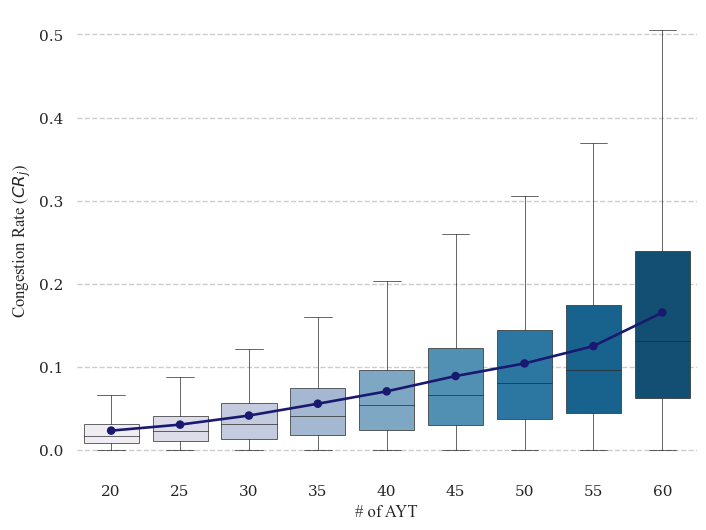

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your dataframe
# Replace 'YT Num' with 'Congestion_ratio'
x_col = 'YT_Num'
y_col = 'Congestion_rate'

# Compute the average Congestion_ratio for each YT_Num
avg_congestion_ratio = interval_10_df.groupby(x_col)[y_col].mean().reset_index()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Remove graph spines
sns.despine(left=True, bottom=True)

# Change the y-axis grid to dashed lines
ax.yaxis.grid(True, linestyle='dashed')

sns.set_theme(style="whitegrid")

# Draw the boxplot without individual data points
# sns.boxplot(data=merged_df, x=x_col, y=y_col, palette="Blues", showfliers=False, linewidth=0.5)
sns.boxplot(data=interval_10_df, x=x_col, y=y_col, palette="PuBu", showfliers=False, linewidth=0.5)

# Overlay a pointplot with the average values
sns.pointplot(data=avg_congestion_ratio, x=x_col, y=y_col, color='midnightblue', markers='o', linestyles='-', scale=0.7)

# Add title and labels
# plt.title('Distribution of Congestion Ratio by YT Num with Average Line')
plt.xlabel('# of AYT', fontsize=12, font = 'Times New Roman')
plt.ylabel('Congestion Rate ($CR_j$)', fontsize = 12, font = 'Times New Roman')

# Show the plot
plt.show()


In [43]:
all_df = interval_10_df.copy()

all_df['alpha_1'] = interval_10_df['file_name'].apply(lambda row : int(row.split('_')[4]))
all_df['alpha_2'] = interval_10_df['file_name'].apply(lambda row : int(row.split('_')[5]))
all_df['alpha_3'] = interval_10_df['file_name'].apply(lambda row : int(row.split('_')[6]))

all_df

Truck_id  Completion_Time                                 file_name  \
2       Truck-109          341.800   now_RoutePoints_10_LP_0_0_100_10rep.csv   
4         Truck-2          355.472  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
5       Truck-107          349.720   now_RoutePoints_10_LP_0_0_100_10rep.csv   
6       Truck-102          355.680   now_RoutePoints_10_LP_0_0_100_10rep.csv   
7         Truck-5          369.968  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
...           ...              ...                                       ...   
122380   Truck-15          506.768  prev_RoutePoints_30_LP_40_50_10_7rep.csv   
122381   Truck-18          510.448  prev_RoutePoints_30_LP_40_50_10_7rep.csv   
122382  Truck-109          501.816   now_RoutePoints_30_LP_40_50_10_7rep.csv   
122383    Truck-4          516.912  prev_RoutePoints_30_LP_40_50_10_7rep.csv   
122384  Truck-124          542.048   now_RoutePoints_30_LP_40_50_10_7rep.csv   

        Route_id  dist  delay_count  Completion_Time_alone  Congestion_rate  \
2            109    15            2             340.010595         0.005263   
4              2    21            5             354.400933         0.003022   
5            107    17            3             344.702204         0.014557   
6            102    21            5             354.400933         0.003609   
7              5    29            5             365.086750         0.013370   
...          ...   ...          ...                    ...              ...   
122380        15    31            6             370.923333         0.366234   
122381        18    53            9             406.186667         0.256683   
122382       109    25            3             356.660800         0.406984   
122383         4    39            6             377.872421         0.367954   
122384       124    57           11             418.196000         0.296158   

        YT_Num  alpha_1  alpha_2  alpha_3  
2           20        0        0      100  
4           20        0        0      100  
5           20        0        0      100  
6           20        0        0      100  
7           20        0        0      100  
...        ...      ...      ...      ...  
122380      60       40       50       10  
122381      60       40       50       10  
122382      60       40       50       10  
122383      60       40       50       10  
122384      60       40       50       10  

[112758 rows x 12 columns]

In [44]:
cr_avg_df = all_df.groupby(['YT_Num', 'alpha_1', 'alpha_2', 'alpha_3'])['Congestion_rate'].mean().reset_index()

# change column name 'congestion_ratio' to 'AVG of Congestion rates'
cr_avg_df = cr_avg_df.rename(columns={'Congestion_rate': 'AVG of Congestion rates'})

# divide by 100 for each alpah_1, alpha_2, alpha_3
cr_avg_df['alpha_1'] = cr_avg_df['alpha_1'] / 100
cr_avg_df['alpha_2'] = cr_avg_df['alpha_2'] / 100
cr_avg_df['alpha_3'] = cr_avg_df['alpha_3'] / 100

cr_avg_df

YT_Num  alpha_1  alpha_2  alpha_3  AVG of Congestion rates
0       20      0.0      0.0      1.0                 0.026266
1       20      0.1      0.8      0.1                 0.022437
2       20      0.2      0.7      0.1                 0.026037
3       20      0.3      0.6      0.1                 0.023964
4       20      0.4      0.5      0.1                 0.023239
..     ...      ...      ...      ...                      ...
72      60      0.0      0.0      1.0                 0.177328
73      60      0.1      0.8      0.1                 0.146306
74      60      0.2      0.7      0.1                 0.168314
75      60      0.3      0.6      0.1                 0.174196
76      60      0.4      0.5      0.1                 0.161543

[77 rows x 5 columns]

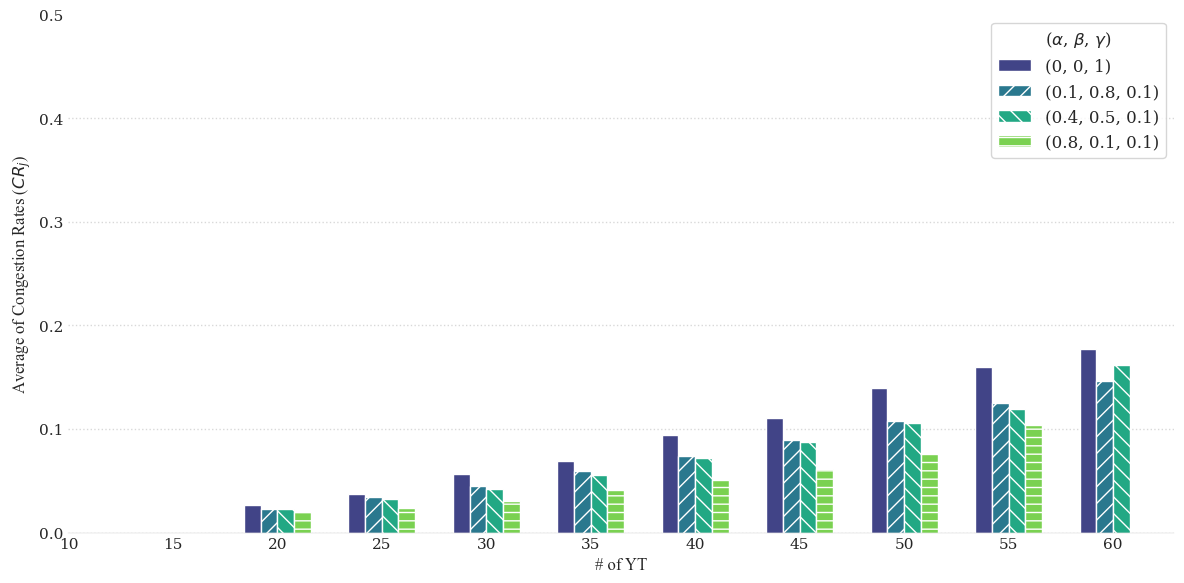

In [45]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = cr_avg_df.copy()

# Define alpha values
alpha_values = [[0, 0.1, 0.4, 0.8],
                [0, 0.8, 0.5, 0.1],
                [1, 0.1, 0.1, 0.1]]


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['YT_Num'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['AVG of Congestion rates'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('# of YT', fontweight='ultralight', font = 'Times New Roman')
ax.set_ylabel('Average of Congestion Rates ($CR_j$)', fontweight='ultralight', font = 'Times New Roman')
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.5)
ax.set_xticks(np.arange(10, 65, 5))
# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size
ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 12})

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)
 
# Show the plot
plt.tight_layout()
plt.show()

### 논문에서 사용할 그림

In [54]:
interval_160_df = pd.read_csv('Modify_prior_congestion.csv')
interval_160_df.head(), interval_160_df.shape

(  Truck_id  Completion_Time                                 file_name  \
 0  Truck-1          346.856  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 1  Truck-7          356.008  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 2  Truck-4          363.688  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 3  Truck-8          373.248  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 4  Truck-9          375.032  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
 
    Route_id  dist  delay_count  Completion_Time_alone  Congestion_rate  YT_Num  
 0         1    17            3             344.702204         0.006248      20  
 1         7    15            2             340.010595         0.047050      20  
 2         4    25            3             356.660800         0.019703      20  
 3         8    29            5             365.086750         0.022354      20  
 4         9    31            6             370.923333         0.011077      20  ,
 (207900, 9))

In [55]:
# Select Congestion rate is greater than 0
interval_160_df = interval_160_df[interval_160_df['Congestion_rate'] >= 0]
interval_160_df.shape

(193520, 9)

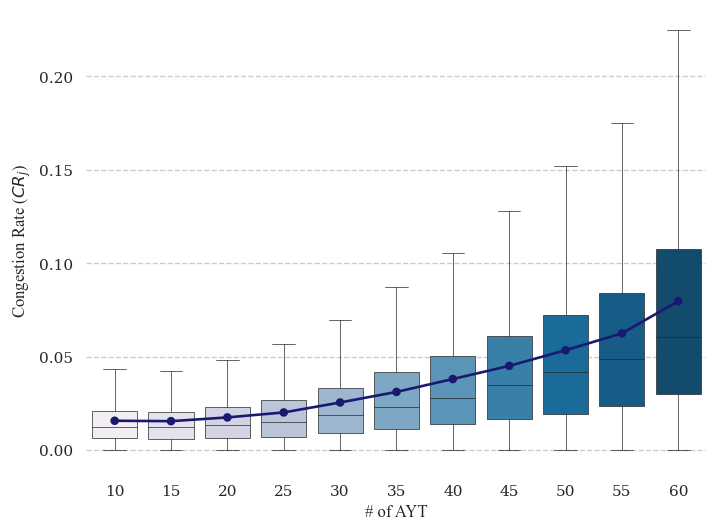

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your dataframe
# Replace 'YT Num' with 'Congestion_ratio'
x_col = 'YT_Num'
y_col = 'Congestion_rate'

# Compute the average Congestion_ratio for each YT_Num
avg_congestion_ratio = interval_160_df.groupby(x_col)[y_col].mean().reset_index()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Remove graph spines
sns.despine(left=True, bottom=True)

# Change the y-axis grid to dashed lines
ax.yaxis.grid(True, linestyle='dashed')

sns.set_theme(style="whitegrid")

# Draw the boxplot without individual data points
# sns.boxplot(data=merged_df, x=x_col, y=y_col, palette="Blues", showfliers=False, linewidth=0.5)
sns.boxplot(data=interval_160_df, x=x_col, y=y_col, palette="PuBu", showfliers=False, linewidth=0.5)

# Overlay a pointplot with the average values
sns.pointplot(data=avg_congestion_ratio, x=x_col, y=y_col, color='midnightblue', markers='o', linestyles='-', scale=0.7)

# Add title and labels
# plt.title('Distribution of Congestion Ratio by YT Num with Average Line')
plt.xlabel('# of AYT', fontsize=12, font = 'Times New Roman')
plt.ylabel('Congestion Rate ($CR_j$)', fontsize = 12, font = 'Times New Roman')

# Show the plot
plt.show()


In [57]:
all_df = interval_160_df.copy()

all_df['alpha_1'] = interval_160_df['file_name'].apply(lambda row : int(row.split('_')[4]))
all_df['alpha_2'] = interval_160_df['file_name'].apply(lambda row : int(row.split('_')[5]))
all_df['alpha_3'] = interval_160_df['file_name'].apply(lambda row : int(row.split('_')[6]))

all_df

Truck_id  Completion_Time                                 file_name  \
0         Truck-1          346.856  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
1         Truck-7          356.008  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
2         Truck-4          363.688  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
3         Truck-8          373.248  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
4         Truck-9          375.032  prev_RoutePoints_10_LP_0_0_100_10rep.csv   
...           ...              ...                                       ...   
207894    Truck-0          380.080   prev_RoutePoints_5_LP_80_10_10_9rep.csv   
207896    Truck-4          395.936   prev_RoutePoints_5_LP_80_10_10_9rep.csv   
207897  Truck-103          404.488    now_RoutePoints_5_LP_80_10_10_9rep.csv   
207898  Truck-104          406.160    now_RoutePoints_5_LP_80_10_10_9rep.csv   
207899  Truck-102          435.392    now_RoutePoints_5_LP_80_10_10_9rep.csv   

        Route_id  dist  delay_count  Completion_Time_alone  Congestion_rate  \
0              1    17            3             344.702204         0.006248   
1              7    15            2             340.010595         0.047050   
2              4    25            3             356.660800         0.019703   
3              8    29            5             365.086750         0.022354   
4              9    31            6             370.923333         0.011077   
...          ...   ...          ...                    ...              ...   
207894         0    33            7             376.547529         0.009381   
207896         4    43           10             393.509714         0.006166   
207897       103    45            9             399.468800         0.012565   
207898       104    49            7             400.346667         0.014521   
207899       102    65           11             423.994667         0.026881   

        YT_Num  alpha_1  alpha_2  alpha_3  
0           20        0        0      100  
1           20        0        0      100  
2           20        0        0      100  
3           20        0        0      100  
4           20        0        0      100  
...        ...      ...      ...      ...  
207894      10       80       10       10  
207896      10       80       10       10  
207897      10       80       10       10  
207898      10       80       10       10  
207899      10       80       10       10  

[193520 rows x 12 columns]

In [58]:
cr_avg_df = all_df.groupby(['YT_Num', 'alpha_1', 'alpha_2', 'alpha_3'])['Congestion_rate'].mean().reset_index()

# change column name 'congestion_ratio' to 'AVG of Congestion rates'
cr_avg_df = cr_avg_df.rename(columns={'Congestion_rate': 'AVG of Congestion rates'})

# divide by 100 for each alpah_1, alpha_2, alpha_3
cr_avg_df['alpha_1'] = cr_avg_df['alpha_1'] / 100
cr_avg_df['alpha_2'] = cr_avg_df['alpha_2'] / 100
cr_avg_df['alpha_3'] = cr_avg_df['alpha_3'] / 100

cr_avg_df

YT_Num  alpha_1  alpha_2  alpha_3  AVG of Congestion rates
0       10      0.0      0.0      1.0                 0.015810
1       10      0.1      0.8      0.1                 0.016526
2       10      0.2      0.7      0.1                 0.015781
3       10      0.3      0.6      0.1                 0.015375
4       10      0.4      0.5      0.1                 0.015578
..     ...      ...      ...      ...                      ...
94      60      0.4      0.5      0.1                 0.079437
95      60      0.5      0.4      0.1                 0.082050
96      60      0.6      0.3      0.1                 0.088338
97      60      0.7      0.2      0.1                 0.089120
98      60      0.8      0.1      0.1                 0.081866

[99 rows x 5 columns]

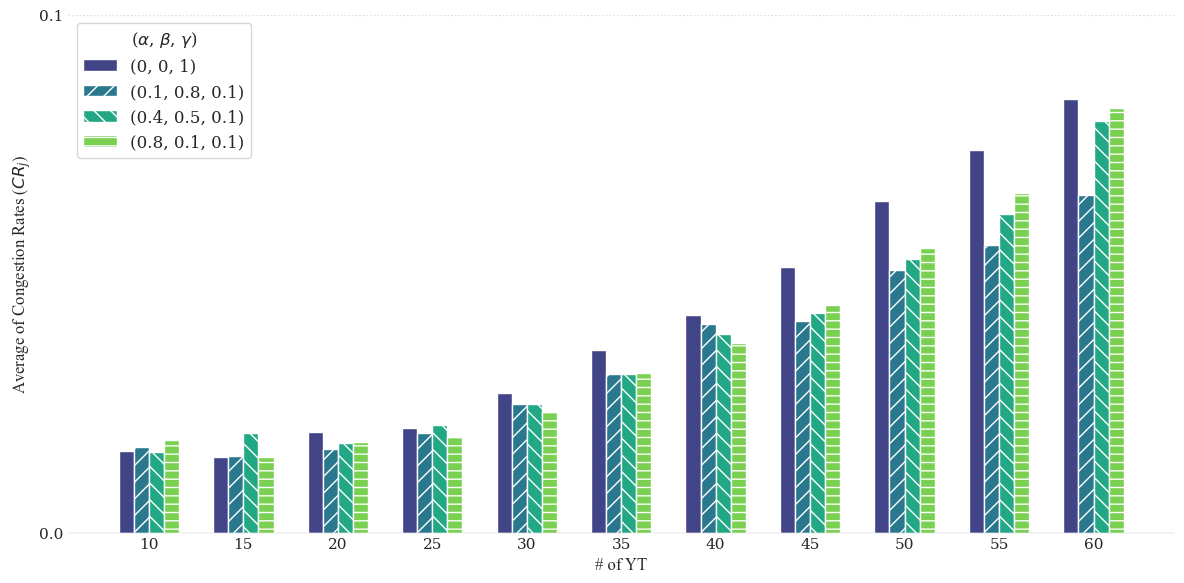

In [59]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = cr_avg_df.copy()

# Define alpha values
alpha_values = [[0, 0.1, 0.4, 0.8],
                [0, 0.8, 0.5, 0.1],
                [1, 0.1, 0.1, 0.1]]


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['YT_Num'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['AVG of Congestion rates'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('# of YT', fontweight='ultralight', font = 'Times New Roman')
ax.set_ylabel('Average of Congestion Rates ($CR_j$)', fontweight='ultralight', font = 'Times New Roman')
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.1)
ax.set_xticks(np.arange(10, 65, 5))
# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size
ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 12})

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)
 
# Show the plot
plt.tight_layout()
plt.show()

In [171]:
cr_avg_40_df = cr_avg_df[cr_avg_df['YT Num'] == 40]
cr_avg_40_df

YT Num  alpha_1  alpha_2  alpha_3  AVG of Congestion rates
54      40      0.0      0.0      1.0                 0.207057
55      40      0.1      0.8      0.1                 0.177814
56      40      0.2      0.7      0.1                 0.173082
57      40      0.3      0.6      0.1                 0.178620
58      40      0.4      0.5      0.1                 0.185509
59      40      0.5      0.4      0.1                 0.185328
60      40      0.6      0.3      0.1                 0.182278
61      40      0.7      0.2      0.1                 0.183385
62      40      0.8      0.1      0.1                 0.179886

In [173]:
cr_avg_60_df = cr_avg_df[cr_avg_df['YT Num'] == 60]
cr_avg_60_df

YT Num  alpha_1  alpha_2  alpha_3  AVG of Congestion rates
90      60      0.0      0.0      1.0                 0.421936
91      60      0.1      0.8      0.1                 0.330337
92      60      0.2      0.7      0.1                 0.352514
93      60      0.3      0.6      0.1                 0.367041
94      60      0.4      0.5      0.1                 0.387864
95      60      0.5      0.4      0.1                 0.412074
96      60      0.6      0.3      0.1                 0.425831
97      60      0.7      0.2      0.1                 0.418583
98      60      0.8      0.1      0.1                 0.400095

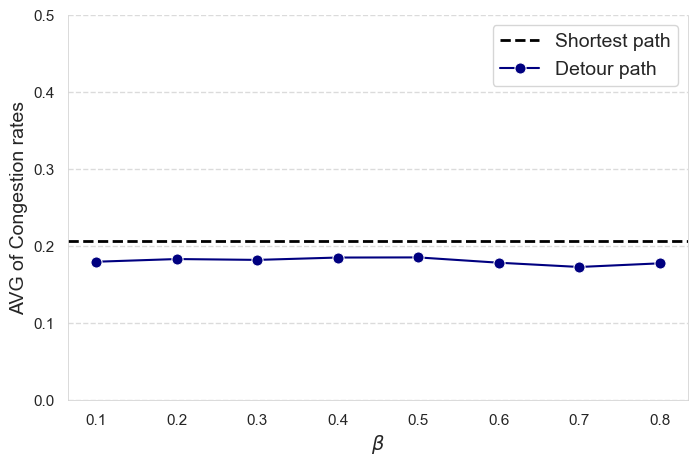

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish seaborn theme
sns.set_theme(style="whitegrid", palette="viridis")

# Extract data for alpha_2=0, 0, 100 and other values
df_40s_ref = cr_avg_40_df[cr_avg_40_df['alpha_2'] == 0]
df_40s_other = cr_avg_40_df[cr_avg_40_df['alpha_2'] != 0]

# Create a stylish plot
plt.figure(figsize=(8, 5))

# Plot horizontal reference line for alpha (0, 0, 100)
plt.axhline(y=df_40s_ref['AVG of Congestion rates'].iloc[0], color='black', linestyle='--', label='Shortest path', linewidth=2)

# Plot other alpha values with a new color (coral)
sns.lineplot(x='alpha_2', y='AVG of Congestion rates', data=df_40s_other, marker='o', label='Detour path', color='navy', markersize=8)

# Set labels and title
plt.xlabel(r"$\beta$", fontsize=14)
plt.ylabel('AVG of Congestion rates', fontsize=14)
plt.yticks(np.arange(0, 0.6, 0.1))
# plt.title('Average Congestion Ratio for 40 YTs')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)

# Customize axis spines
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().xaxis.grid(False)

# Display the plot
plt.show()


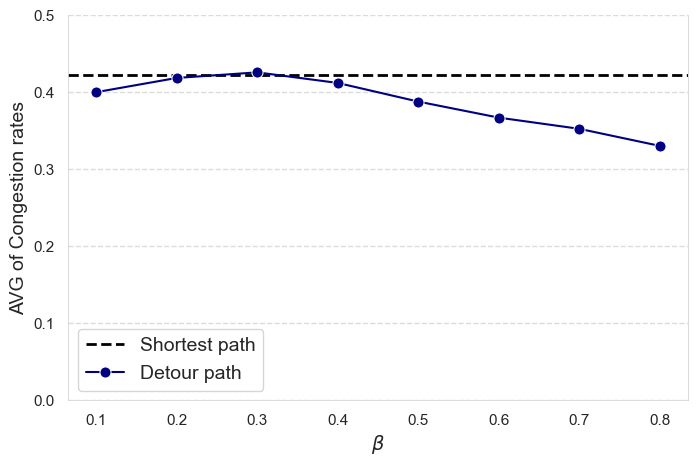

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish seaborn theme
sns.set_theme(style="whitegrid", palette="viridis")

# Extract data for alpha_2=0, 0, 100 and other values
df_60s_ref = cr_avg_60_df[cr_avg_60_df['alpha_2'] == 0]
df_60s_other = cr_avg_60_df[cr_avg_60_df['alpha_2'] != 0]

# Create a stylish plot
plt.figure(figsize=(8, 5))

# Plot horizontal reference line for alpha (0, 0, 100)
plt.axhline(y=df_60s_ref['AVG of Congestion rates'].iloc[0], color='black', linestyle='--', label='Shortest path', linewidth=2)

# Plot other alpha values with a new color (coral)
sns.lineplot(x='alpha_2', y='AVG of Congestion rates', data=df_60s_other, marker='o', label='Detour path', color='navy', markersize=8)

# Set labels and title
plt.xlabel(r"$\beta$", fontsize=14)
plt.ylabel('AVG of Congestion rates', fontsize=14)
plt.yticks(np.arange(0, 0.6, 0.1))
# plt.title('Average Congestion Ratio for 40 YTs')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)

# Customize axis spines
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().xaxis.grid(False)

# Display the plot
plt.show()


In [93]:
all_df['Rep_Num'] = all_df['file_name'].apply(lambda row : row.split('_')[-1]).apply(lambda row : int(row.split('rep')[0]))

In [94]:
shortest_df = all_df[all_df['alpha_1'] == 0]
others_df = all_df[all_df['alpha_1'] != 0]

In [97]:
others_df.shape, shortest_df.shape

((98663, 13), (14095, 13))

In [100]:
others_df[(others_df['file_name'] == 'now_RoutePoints_10_LP_10_80_10_10rep.csv') & (others_df['Rep_Num'] == 10) & (others_df['Truck_id'] == 'Truck-109') & (others_df['YT_Num'] == 20)]

Truck_id  Completion_Time                                 file_name  \
1202  Truck-109          342.072  now_RoutePoints_10_LP_10_80_10_10rep.csv   

      Route_id  dist  delay_count  Completion_Time_alone  Congestion_rate  \
1202       109    15            2             340.010595         0.006063   

      YT_Num  alpha_1  alpha_2  alpha_3  Rep_Num  
1202      20       10       80       10       10

In [104]:
shortest_df[(shortest_df['file_name'] == 'now_RoutePoints_10_LP_0_0_100_10rep.csv') & (shortest_df['Rep_Num'] == 10) & (shortest_df['Truck_id'] == 'Truck-109') & (shortest_df['YT_Num'] == 20)]

Truck_id  Completion_Time                                file_name  \
2  Truck-109            341.8  now_RoutePoints_10_LP_0_0_100_10rep.csv   

   Route_id  dist  delay_count  Completion_Time_alone  Congestion_rate  \
2       109    15            2             340.010595         0.005263   

   YT_Num  alpha_1  alpha_2  alpha_3  Rep_Num  
2      20        0        0      100       10

In [96]:
# merge shortest_df and others_df by 'Rep_Num' and 'Truck_id' and 'YT_Num'
merged_df = pd.merge(others_df, shortest_df[['Rep_Num', 'Truck_id', 'YT_Num', 'Completion_Time_alone', 'Completion_Time']],
                     on=['Rep_Num', 'Truck_id', 'YT_Num'],
                     suffixes=('_LP', '_shortest'))

merged_df

Truck_id  Completion_Time_LP  \
0      Truck-109             342.072   
1      Truck-109             342.072   
2      Truck-109             342.312   
3      Truck-109             341.568   
4      Truck-109             342.296   
...          ...                 ...   
94497    Truck-0             426.152   
94498    Truck-0             455.448   
94499    Truck-0             437.888   
94500   Truck-18             416.928   
94501   Truck-18             353.688   

                                       file_name  Route_id  dist  delay_count  \
0       now_RoutePoints_10_LP_10_80_10_10rep.csv       109    15            2   
1       now_RoutePoints_10_LP_20_70_10_10rep.csv       109    15            2   
2       now_RoutePoints_10_LP_30_60_10_10rep.csv       109    15            2   
3       now_RoutePoints_10_LP_40_50_10_10rep.csv       109    15            2   
4       now_RoutePoints_10_LP_50_40_10_10rep.csv       109    15            2   
...                                          ...       ...   ...          ...   
94497   prev_RoutePoints_30_LP_20_70_10_6rep.csv         0    35           10   
94498   prev_RoutePoints_30_LP_30_60_10_6rep.csv         0    45           11   
94499   prev_RoutePoints_30_LP_40_50_10_6rep.csv         0    35           10   
94500  prev_RoutePoints_30_LP_30_60_10_18rep.csv        18    31            4   
94501  prev_RoutePoints_30_LP_40_50_10_18rep.csv        18    21            3   

       Completion_Time_alone_LP  Congestion_rate  YT_Num  alpha_1  alpha_2  \
0                    340.010595         0.006063      20       10       80   
1                    340.010595         0.006063      20       20       70   
2                    340.010595         0.006769      20       30       60   
3                    340.010595         0.004580      20       40       50   
4                    340.010595         0.006722      20       50       40   
...                         ...              ...     ...      ...      ...   
94497                381.196267         0.117933      60       20       70   
94498                405.760000         0.122457      60       30       60   
94499                381.196267         0.148721      60       40       50   
94500                371.948364         0.120930      60       30       60   
94501                350.256000         0.009799      60       40       50   

       alpha_3  Rep_Num  Completion_Time_alone_shortest  \
0           10       10                      340.010595   
1           10       10                      340.010595   
2           10       10                      340.010595   
3           10       10                      340.010595   
4           10       10                      340.010595   
...        ...      ...                             ...   
94497       10        6                      381.378000   
94498       10        6                      381.378000   
94499       10        6                      381.378000   
94500       10       18                      350.256000   
94501       10       18                      350.256000   

       Completion_Time_shortest  
0                       341.800  
1                       341.800  
2                       341.800  
3                       341.800  
4                       341.800  
...                         ...  
94497                   478.088  
94498                   478.088  
94499                   478.088  
94500                   372.392  
94501                   372.392  

[94502 rows x 15 columns]

In [99]:
# count the nan value
merged_df.isnull().sum()

Truck_id                          0
Completion_Time_LP                0
file_name                         0
Route_id                          0
dist                              0
delay_count                       0
Completion_Time_alone_LP          0
Congestion_rate                   0
YT_Num                            0
alpha_1                           0
alpha_2                           0
alpha_3                           0
Rep_Num                           0
Completion_Time_alone_shortest    0
Completion_Time_shortest          0
dtype: int64

In [107]:
alpha1_80_df = merged_df[merged_df['alpha_1'] == 80]
yt_40_df = alpha1_80_df[alpha1_80_df['YT_Num'] == 40]
yt_40_df

Truck_id  Completion_Time_LP  \
43007   Truck-16             377.360   
43015  Truck-114             343.480   
43023   Truck-19             354.744   
43030   Truck-10             383.672   
43038  Truck-108             348.720   
...          ...                 ...   
60594  Truck-104             350.448   
60597    Truck-8             346.664   
60600    Truck-3             385.576   
60606   Truck-10             341.256   
60611   Truck-14             362.072   

                                       file_name  Route_id  dist  delay_count  \
43007  prev_RoutePoints_20_LP_80_10_10_10rep.csv        16    29            5   
43015   now_RoutePoints_20_LP_80_10_10_10rep.csv       114    15            2   
43023  prev_RoutePoints_20_LP_80_10_10_10rep.csv        19    15            2   
43030  prev_RoutePoints_20_LP_80_10_10_10rep.csv        10    27            6   
43038   now_RoutePoints_20_LP_80_10_10_10rep.csv       108    17            3   
...                                          ...       ...   ...          ...   
60594   now_RoutePoints_20_LP_80_10_10_55rep.csv       104    17            3   
60597   prev_RoutePoints_20_LP_80_10_10_5rep.csv         8    17            3   
60600  prev_RoutePoints_20_LP_80_10_10_10rep.csv         3    29            5   
60606  prev_RoutePoints_20_LP_80_10_10_58rep.csv        10    15            2   
60611  prev_RoutePoints_20_LP_80_10_10_24rep.csv        14    15            2   

       Completion_Time_alone_LP  Congestion_rate  YT_Num  alpha_1  alpha_2  \
43007                365.086750         0.033617      40       80       10   
43015                340.010595         0.010204      40       80       10   
43023                340.010595         0.043332      40       80       10   
43030                363.599429         0.055205      40       80       10   
43038                344.702204         0.011656      40       80       10   
...                         ...              ...     ...      ...      ...   
60594                344.702204         0.016669      40       80       10   
60597                344.702204         0.005691      40       80       10   
60600                365.086750         0.056122      40       80       10   
60606                340.010595         0.003663      40       80       10   
60611                340.010595         0.064884      40       80       10   

       alpha_3  Rep_Num  Completion_Time_alone_shortest  \
43007       10       10                      340.010595   
43015       10       10                      340.010595   
43023       10       10                      354.400933   
43030       10       10                      381.378000   
43038       10       10                      344.702204   
...        ...      ...                             ...   
60594       10       55                      344.702204   
60597       10        5                      362.630286   
60600       10       10                      376.547529   
60606       10       58                      340.010595   
60611       10       24                      354.400933   

       Completion_Time_shortest  
43007                   344.232  
43015                   350.992  
43023                   374.352  
43030                   492.616  
43038                   361.144  
...                         ...  
60594                   346.080  
60597                   364.232  
60600                   413.632  
60606                   344.104  
60611                   364.120  

[2190 rows x 15 columns]

In [129]:
random_yt_num = 100

random_40_df = yt_40_df.sample(n=random_yt_num, random_state=7).reset_index()

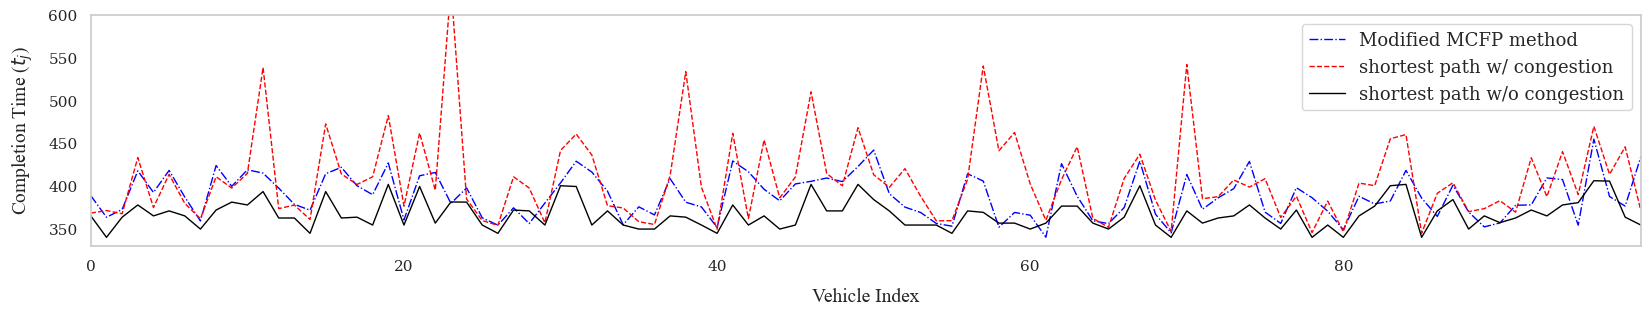

In [131]:
figsize = (20, 3)
ylim = (330, 600)


plt.figure(figsize=figsize)

_linewidth = 1
# Plot Completion_Time_alone against the index
plt.plot(random_40_df.index, random_40_df['Completion_Time_LP'], label='Modified MCFP method', linestyle='-.', color = 'blue', linewidth=_linewidth)
plt.plot(random_40_df.index, random_40_df['Completion_Time_shortest'], label='shortest path w/ congestion', linestyle='--', color = 'red', linewidth=_linewidth)
plt.plot(random_40_df.index, random_40_df['Completion_Time_alone_shortest'], label='shortest path w/o congestion', linestyle='-', color = 'black', linewidth=_linewidth)

plt.xlabel('Vehicle Index', fontsize = 14, labelpad=10, font='Times New Roman')
plt.ylabel('Completion Time ($t_j$)', fontsize = 14, labelpad=10, font='Times New Roman')

plt.xlim((0, random_yt_num - 1))

plt.ylim(ylim)

plt.legend(fontsize = 13, loc = 'upper right')

# remove grid
plt.grid(False)

plt.show()

In [2]:
folder_path = 'Results'
y_col = ['C_max', 'Congestion_ratio_AVG']

cr_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])
cr_dfs = f.to_numeric(cr_dfs, y_col[1])
cr_dfs

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  510                 5                5       80       10       10          56   
  511                 5                5       80       10       10          57   
  512                 5                5       80       10       10          58   
  513                 5                5       80       10       10          59   
  514                 5                5       80       10       10  

In [3]:
# Dictionary of DataFrames
gap_dict = {}

for file_name, df in cr_dfs:
    print(file_name)
    grouped_df = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio_AVG'].mean().reset_index()
    shortest_cr = grouped_df.loc[grouped_df['alpha_1'] == 0, 'Congestion_ratio_AVG'].values[0]
    grouped_df['Gap'] = (grouped_df['Congestion_ratio_AVG'] - shortest_cr) / shortest_cr * 100
    gap_dict[file_name] = grouped_df

prev_5_now_5
prev_5_now_10
prev_10_now_10
prev_10_now_15
prev_15_now_15
prev_15_now_20
prev_20_now_20
prev_20_now_25
prev_25_now_25
prev_25_now_30
prev_30_now_30


In [4]:
# Create an empty DataFrame
merged_df = pd.DataFrame()

# Iterate through the dictionary items
for key, df in gap_dict.items():
    # Create a new DataFrame with the key in the first row and the values in the second row
    key_df = pd.DataFrame({'file name': [key]})
    value_df = df.copy().reset_index(drop=True)
    
    # Concatenate the key DataFrame and the value DataFrame
    result_df = pd.concat([key_df, value_df], ignore_index=True)
    
    # Append the result to the merged DataFrame
    merged_df = pd.concat([merged_df, result_df], ignore_index=True)

# Save the merged DataFrame to a single CSV file
merged_df.to_csv('Gap.csv', index=False)

In [6]:
column_order = ['yt_num', 'best_weight', y_col[0] + '_mean', y_col[0]+'_std']
cr_tb = pd.DataFrame(columns= column_order)

for file_name, df in cr_dfs:

    yt_num = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
    df_groupby = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[y_col[0]]

    mean_df = df_groupby.mean().reset_index()
    std_df = df_groupby.std().reset_index()
    
    # merge mean and std
    df_groupby = pd.merge(mean_df, std_df, on=['alpha_1', 'alpha_2', 'alpha_3'], suffixes=('_mean', '_std'))

    best_df = df_groupby[df_groupby[column_order[2]] == df_groupby[column_order[2]].min()]
    shortest_df = df_groupby[df_groupby['alpha_1'] == 0]
    
    str_yt_num = str(yt_num) + ' (' + df['Prev Truck Number'].unique()[0] + ', ' + df['Now Truck Number'].unique()[0] + ')'
    str_best_weight = str(best_df['alpha_1'].values[0]) + ', ' + str(best_df['alpha_2'].values[0]) + ', ' + str(best_df['alpha_3'].values[0])
    best_df = best_df.assign(yt_num = str_yt_num, best_weight = str_best_weight)
    best_df = best_df[column_order]
    
    best_df[column_order[2]] = best_df[column_order[2]].values - shortest_df[column_order[2]].values
    best_df[column_order[3]] = best_df[column_order[3]].values - shortest_df[column_order[3]].values
      
    cr_tb = pd.concat([cr_tb, best_df], ignore_index=True)
    
cr_tb

yt_num best_weight  C_max_mean  C_max_std
0     10 (5, 5)   0, 0, 100    0.000000   0.000000
1    15 (5, 10)   0, 0, 100    0.000000   0.000000
2   20 (10, 10)  40, 50, 10   -1.601404  -1.355594
3   25 (10, 15)  60, 30, 10   -1.586831  -0.628609
4   30 (15, 15)  60, 30, 10   -1.294316   0.395979
5   35 (15, 20)  50, 40, 10   -2.682793  -3.327396
6   40 (20, 20)  30, 60, 10   -4.123601  -4.298080
7   45 (20, 25)  10, 80, 10   -2.720121  -2.279262
8   50 (25, 25)  70, 20, 10   -7.632716   0.328066
9   55 (25, 30)  10, 80, 10  -11.248171  -3.013281
10  60 (30, 30)  50, 40, 10  -15.875067  -9.860755

In [7]:
folder_path = 'Results'
y_col = ['C_max']

c_max_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])
c_max_dfs

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  510                 5                5       80       10       10          56   
  511                 5                5       80       10       10          57   
  512                 5                5       80       10       10          58   
  513                 5                5       80       10       10          59   
  514                 5                5       80       10       10  

In [8]:
column_order = ['yt_num', 'best_weight', y_col[0] + '_mean', y_col[0]+'_std']
c_max_tb = pd.DataFrame(columns= column_order)

for file_name, df in c_max_dfs:

    yt_num = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
    df_groupby = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[y_col[0]]

    mean_df = df_groupby.mean().reset_index()
    std_df = df_groupby.std().reset_index()
    
    # merge mean and std
    df_groupby = pd.merge(mean_df, std_df, on=['alpha_1', 'alpha_2', 'alpha_3'], suffixes=('_mean', '_std'))

    best_df = df_groupby[df_groupby[column_order[2]] == df_groupby[column_order[2]].min()]
    shortest_df = df_groupby[df_groupby['alpha_1'] == 0]
    
    str_yt_num = str(yt_num) + ' (' + df['Prev Truck Number'].unique()[0] + ', ' + df['Now Truck Number'].unique()[0] + ')'
    str_best_weight = str(best_df['alpha_1'].values[0]) + ', ' + str(best_df['alpha_2'].values[0]) + ', ' + str(best_df['alpha_3'].values[0])
    best_df = best_df.assign(yt_num = str_yt_num, best_weight = str_best_weight)
    best_df = best_df[column_order]
    
    best_df[column_order[2]] = (best_df[column_order[2]].values - shortest_df[column_order[2]].values) / shortest_df[column_order[2]].values
    best_df[column_order[3]] = (best_df[column_order[3]].values - shortest_df[column_order[3]].values) / shortest_df[column_order[3]].values
      
    c_max_tb = pd.concat([c_max_tb, best_df], ignore_index=True)
    
c_max_tb

yt_num best_weight  C_max_mean  C_max_std
0     10 (5, 5)   0, 0, 100    0.000000   0.000000
1    15 (5, 10)   0, 0, 100    0.000000   0.000000
2   20 (10, 10)  40, 50, 10   -0.003901  -0.120407
3   25 (10, 15)  60, 30, 10   -0.003849  -0.058123
4   30 (15, 15)  60, 30, 10   -0.003108   0.045542
5   35 (15, 20)  50, 40, 10   -0.006319  -0.257497
6   40 (20, 20)  30, 60, 10   -0.009544  -0.314393
7   45 (20, 25)  10, 80, 10   -0.006268  -0.170433
8   50 (25, 25)  70, 20, 10   -0.017130   0.023242
9   55 (25, 30)  10, 80, 10   -0.024639  -0.195097
10  60 (30, 30)  50, 40, 10   -0.033842  -0.435570

In [9]:
folder_path = 'Results'
y_col = ['Congestion_ratio_AVG', 'C_max']

ev_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[1])
ev_dfs = f.to_numeric(ev_dfs, y_col[0])
ev_dfs

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  510                 5                5       80       10       10          56   
  511                 5                5       80       10       10          57   
  512                 5                5       80       10       10          58   
  513                 5                5       80       10       10          59   
  514                 5                5       80       10       10  

In [10]:
column_order = ['yt_num', 'best_weight', 'Congestion_ratio_AVG', 'C_max']
ev_tb = pd.DataFrame(columns= column_order)

for file_name, df in ev_dfs:
    
    yt_num = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
    df_groupby = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[['Congestion_ratio_AVG', 'C_max']]

    mean_df = df_groupby.mean().reset_index()
    std_df = df_groupby.std().reset_index()
    
    # merge mean and std
    df_groupby = pd.merge(mean_df, std_df, on=['alpha_1', 'alpha_2', 'alpha_3'], suffixes=('_mean', '_std'))

#     best_df = df_groupby[df_groupby['Congestion_ratio_AVG_mean'] == df_groupby['Congestion_ratio_AVG_mean'].min()]
#     shortest_df = df_groupby[df_groupby['alpha_1'] == 0]
    
#     str_yt_num = str(yt_num) + ' (' + df['Prev Truck Number'].unique()[0] + ', ' + df['Now Truck Number'].unique()[0] + ')'
#     str_best_weight = str(best_df['alpha_1'].values[0]) + ', ' + str(best_df['alpha_2'].values[0]) + ', ' + str(best_df['alpha_3'].values[0])
#     best_df = best_df.assign(yt_num = str_yt_num, best_weight = str_best_weight)
#     best_df = best_df[column_order]
    
#     best_df['Congestion_ratio_AVG_mean'] = best_df['Congestion_ratio_AVG_mean'].values - shortest_df['Congestion_ratio_AVG_mean'].values
#     best_df['Congestion_ratio_AVG_std'] = best_df['Congestion_ratio_AVG_std'].values - shortest_df['Congestion_ratio_AVG_std'].values
      
#     ev_tb = pd.concat([ev_tb, best_df], ignore_index=True)
    
# ev_tb

In [10]:
def line_subplot(_df, _x_col, _y_col, _title, _figsize, _y_lim, _legend_loc):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = _figsize)
        
    _shortest_df = _df[_df['alpha_1'] == 0]
    _others_df = _df[_df['alpha_1'] != 0]

    # Plot for _shortest_df
    axes[0].set_title(_title + ' of Shortest', fontsize= 12)
    axes[1].set_title(_title + ' of LP', fontsize= 12)

    for y_col_i in _y_col:
        _shortest_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[0], label= 'Mean of ' + y_col_i)
        _others_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[1], label= 'Mean of ' + y_col_i)
        
        mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
        min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
        max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

        mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
        min_others = _others_df.groupby(_x_col)[y_col_i].min()
        max_others = _others_df.groupby(_x_col)[y_col_i].max()

        axes[0].fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.2)
        axes[1].fill_between(mean_others.index, min_others, max_others, alpha=0.2)

    # Set common y-axis limits
    for ax in axes:
        ax.set_ylim(_y_lim)
        # ax.set_xlabel(_x_col)
        ax.set_ylabel('Completion Time')
        ax.legend(loc = _legend_loc, fontsize = 9)    

    plt.suptitle(_title)
    plt.show()

In [8]:
folder_path = 'Results'
_y_col = ['Congestion_ratio', 'TravelTime_by_Distance']

travel_dfs = f.get_dfs_by_folder(folder_path, _y_col, True, _y_col[0])

concat_df_10_80_10 = pd.DataFrame()

for file_name, df in travel_dfs:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    df_10_80_10 = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # concat shortest_df and others_df and concat_df
    concat_df_10_80_10 = pd.concat([concat_df_10_80_10, shortest_df, df_10_80_10], ignore_index=True)

# Add Column Number of YT
concat_df_10_80_10['Number of YT'] = concat_df_10_80_10['Prev Truck Number'].astype(int) + concat_df_10_80_10['Now Truck Number'].astype(int)
concat_df_10_80_10['TravelTime_by_Distance'] = concat_df_10_80_10['TravelTime_by_Distance'].astype(float)

Remove outliers by  Congestion_ratio !


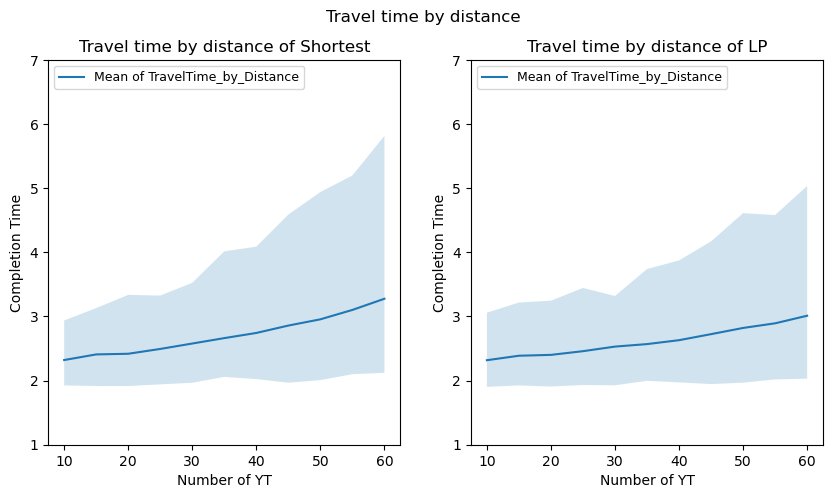

In [11]:
x_col = 'Number of YT'
y_col = ['TravelTime_by_Distance']
title = 'Travel time by distance'
figsize = (10, 5)
y_lim = (1, 7)

line_subplot(concat_df_10_80_10, x_col, y_col, title, figsize, y_lim, 'upper left')

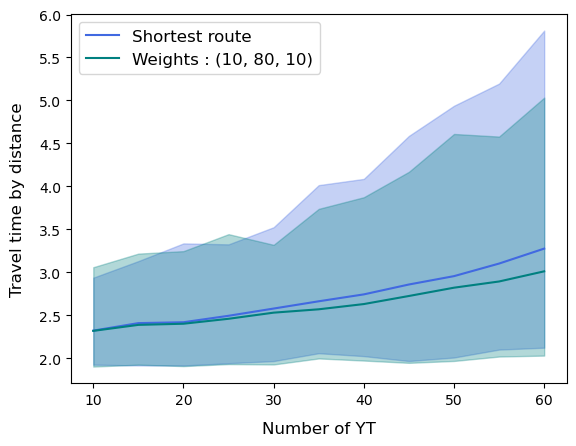

In [124]:
# line plot
_x_col = 'Number of YT'
_y_col = ['TravelTime_by_Distance']

_shortest_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] == 0]
_others_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] != 0]

# Define colors for each curve
shortest_color = 'royalblue'
others_color = 'teal'

figsize = (10, 5)
for y_col_i in _y_col:
    _shortest_df.groupby(_x_col)[y_col_i].mean().plot(label= 'Shortest route', color = shortest_color)
    _others_df.groupby(_x_col)[y_col_i].mean().plot(label= 'Weights : (10, 80, 10)', color = others_color)
    
    mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
    min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
    max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

    mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
    min_others = _others_df.groupby(_x_col)[y_col_i].min()
    max_others = _others_df.groupby(_x_col)[y_col_i].max()
    
    plt.fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.3, color = shortest_color)
    plt.fill_between(mean_others.index, min_others, max_others, alpha=0.3, color = others_color)
    # plt.fill_between(mean_shortest.index, min_shortest, max_shortest, color = shortest_color)
    # plt.fill_between(mean_others.index, min_others, max_others, color = others_color)

plt.legend(loc = 'upper left', fontsize = 12)
# set y-axis label
plt.ylabel('Travel time by distance', fontsize = 12, labelpad=10)
# set size of x-axis label
plt.xlabel('Number of YT', fontsize = 12, labelpad=10)
plt.show()

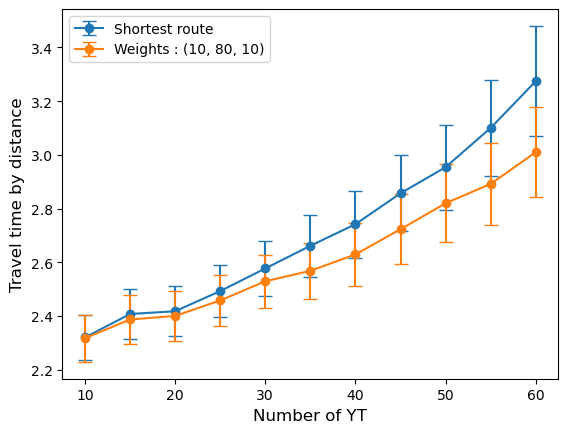

In [129]:
_x_col = 'Number of YT'
_y_col = 'TravelTime_by_Distance'

_shortest_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] == 0]
_others_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] != 0]

# Calculate mean and relative standard deviation for both cases
mean_shortest = _shortest_df.groupby(_x_col)[_y_col].mean()
std_shortest = _shortest_df.groupby(_x_col)[_y_col].std() / mean_shortest

mean_others = _others_df.groupby(_x_col)[_y_col].mean()
std_others = _others_df.groupby(_x_col)[_y_col].std() / mean_others

# Plot mean values with error bars representing relative standard deviation
plt.errorbar(mean_shortest.index, mean_shortest, yerr=std_shortest, label='Shortest route', capsize=5, marker='o')
plt.errorbar(mean_others.index, mean_others, yerr=std_others, label='Weights : (10, 80, 10)', capsize=5, marker='o')

# Add labels and legend
plt.xlabel('Number of YT', fontsize=12)
plt.ylabel('Travel time by distance', fontsize=12)
plt.legend()

# Show the plot
plt.show()

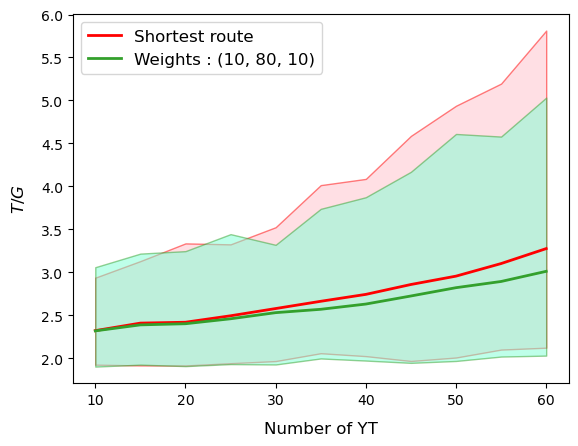

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# line plot
_x_col = 'Number of YT'
_y_col = ['TravelTime_by_Distance']

_shortest_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] == 0]
_others_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] != 0]

# Define colors for each curve
shortest_line_color = '#FF0000'  # Darker blue for the line edge
shortest_fill_color = '#FFC0CB'  # Lighter blue for the fill

others_line_color = '#33a02c'    # Darker green for the line edge
others_fill_color = '#7FFFD4'    # Lighter green for the fill

figsize = (10, 5)
for y_col_i in _y_col:
    # Plot the line with a darker color for the edge
    _shortest_df.groupby(_x_col)[y_col_i].mean().plot(label='Shortest route', color=shortest_line_color, linewidth=2)
    _others_df.groupby(_x_col)[y_col_i].mean().plot(label='Weights : (10, 80, 10)', color=others_line_color, linewidth=2)
    
    mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
    min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
    max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

    mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
    min_others = _others_df.groupby(_x_col)[y_col_i].min()
    max_others = _others_df.groupby(_x_col)[y_col_i].max()
    
    # Fill the area with a lighter color and higher transparency
    plt.fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.5, color=shortest_fill_color, edgecolor=shortest_line_color)
    plt.fill_between(mean_others.index, min_others, max_others, alpha=0.5, color=others_fill_color, edgecolor=others_line_color)

plt.legend(loc='upper left', fontsize=12)
# set y-axis label
plt.ylabel('$T/G$', fontsize=12, labelpad=10)
# set size of x-axis label
plt.xlabel('Number of AYT', fontsize=12, labelpad=10)
plt.show()


In [17]:
# # travel_dfs = {}
# # Initialize an empty DataFrame to store the results
# congestion_ratio_avg_merged_df = pd.DataFrame()

# for df_name, df in travel_dfs:
    
#     Number_of_YT = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
#     grouped_df = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio_AVG'].mean().reset_index()
#     grouped_df['Number_of_YTs'] = Number_of_YT
#     congestion_ratio_avg_new_dfs[df_name] = grouped_df
    
#     congestion_ratio_avg_merged_df = pd.concat([congestion_ratio_avg_merged_df, grouped_df], ignore_index=True)

# print(congestion_ratio_avg_merged_df)
    

In [18]:
congestion_ratio_avg_merged_df.sort_values(by=['Number_of_YTs', 'Congestion_ratio_AVG']).groupby('Number_of_YTs').head(3)['alpha_1'].value_counts()

NameError: name 'congestion_ratio_avg_merged_df' is not defined

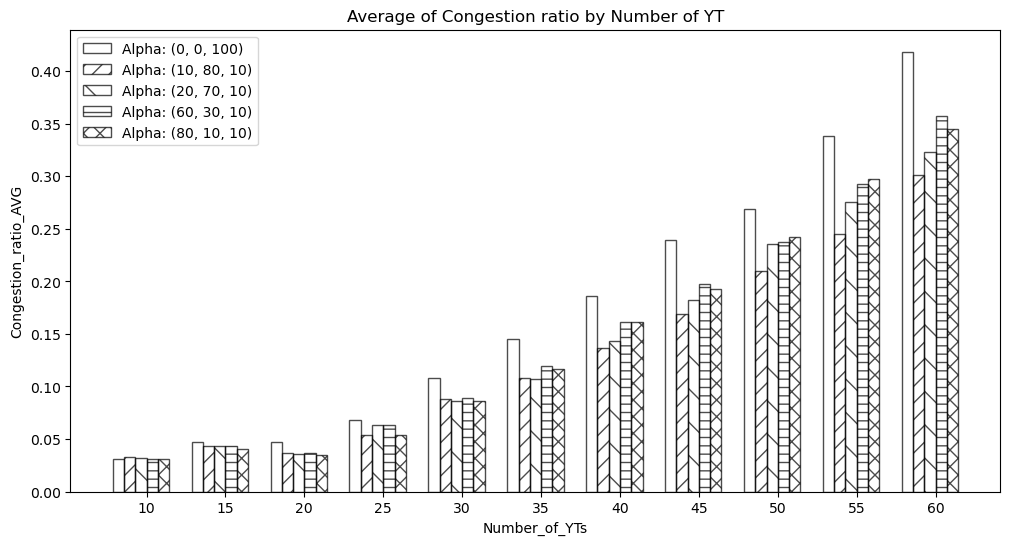

In [ ]:
x_col_name = 'Number_of_YTs'
y_col_name = 'Congestion_ratio_AVG'
title = 'Average of Congestion ratio by Number of YT'

alpha_1_list = [0, 10, 20, 60, 80]

# Filter the DataFrame based on 'alpha_1_list'
filtered_df = congestion_ratio_avg_merged_df[congestion_ratio_avg_merged_df['alpha_1'].isin(alpha_1_list)]

f.bar_plot_hatch(filtered_df, x_col_name, y_col_name, title)

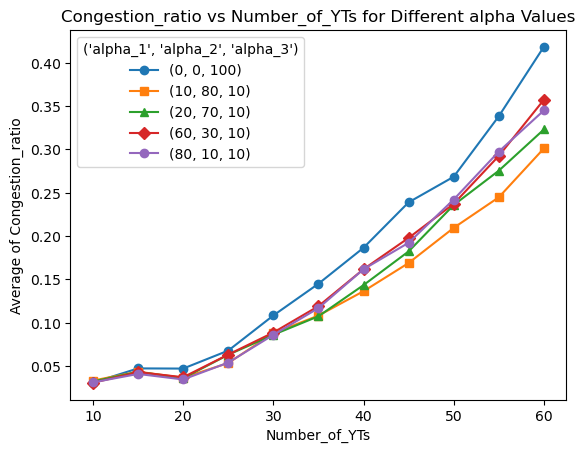

In [ ]:
from itertools import cycle

# Group by 'alpha_1', 'alpha_2', 'alpha_3'
grouped_by_alpha = filtered_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

# Define a list of markers
markers = ['o', 's', '^', 'D']

# Use cycle to create a cycling iterator for markers
marker_cycle = cycle(markers)

# Plot each group with a different marker
for name, group in grouped_by_alpha:
    marker = next(marker_cycle)
    plt.plot(group['Number_of_YTs'], group['Congestion_ratio_AVG'], label=name, marker=marker)

# Set labels and title
plt.xlabel('Number_of_YTs')
plt.ylabel('Average of Congestion_ratio')
plt.title('Congestion_ratio vs Number_of_YTs for Different alpha Values')
plt.legend(title=('alpha_1', 'alpha_2', 'alpha_3'))
# plt.ylim(0, 1)

# Show the plot
plt.show()

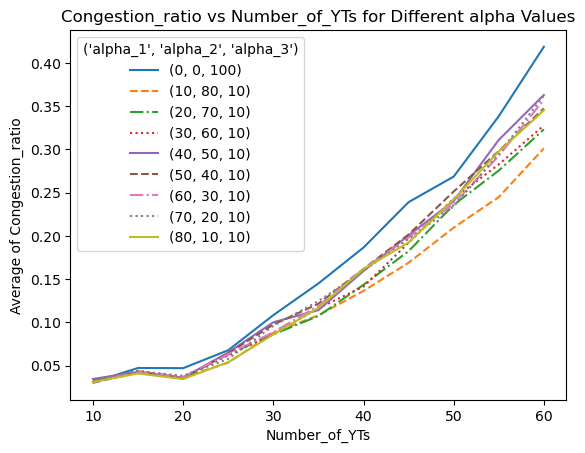

In [ ]:
# Group by 'alpha_1', 'alpha_2', 'alpha_3'
grouped_by_alpha = congestion_ratio_avg_merged_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

# Define a dictionary to map line styles to each group
line_styles = {
    (0, 0, 100): '-',
    (10, 80, 10): '--',
    (20, 70, 10): '-.',
    (30, 60, 10): ':',
    (40, 50, 10): '-',
    (50, 40, 10): '--',
    (60, 30, 10): '-.',
    (70, 20, 10): ':',
    (80, 10, 10): '-',
}

# Plot each group with the corresponding line style
for name, group in grouped_by_alpha:
    linestyle = line_styles.get(name, '-')  # Use a solid line if no specific style is defined
    plt.plot(group['Number_of_YTs'], group['Congestion_ratio_AVG'], label=name, linestyle=linestyle)

# Set labels and title
plt.xlabel('Number_of_YTs')
plt.ylabel('Average of Congestion_ratio')
plt.title('Congestion_ratio vs Number_of_YTs for Different alpha Values')
plt.legend(title=('alpha_1', 'alpha_2', 'alpha_3'))
# plt.ylim(0,1)
# Show the plot
plt.show()

### 40, 60대 일때 Completion time

In [101]:
import function as f 

folder_path = '../Simulation/Assets/Results/Modify_prior_congestion'
_y_col = ['Congestion_ratio', 'Truck_id', 'Completion_Time_alone', 'Completion_Time']

completion_dfs = f.get_dfs_by_folder(folder_path, _y_col, True, _y_col[0])

# Initialize an empty DataFrame to store the results
concat_df = pd.DataFrame()

for df_name, df in completion_dfs:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    others_df = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # Merge DataFrames based on common columns
    merged_df = pd.merge(others_df, shortest_df[['repeat_num', 'Truck_id', 'Completion_Time_alone', 'Completion_Time']],
                         on=['repeat_num', 'Truck_id'],
                         suffixes=('_LP', '_shortest'))
    # # Drop duplicates based on all columns
    # merged_df = merged_df.drop_duplicates()
    
    # Drop Completion_Time_alone_LP column
    merged_df = merged_df.drop(columns=['Completion_Time_alone_LP'])
    
    concat_df = pd.concat([concat_df, merged_df], ignore_index=True)

print(concat_df)

Remove outliers by  Congestion_ratio !
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                     5                5       10       80       10   
1                     5                5       10       80       10   
2                     5                5       10       80       10   
3                     5                5       10       80       10   
4                     5                5       10       80       10   
...                 ...              ...      ...      ...      ...   
21453                30               30       10       80       10   
21454                30               30       10       80       10   
21455                30               30       10       80       10   
21456                30               30       10       80       10   
21457                30               30       10       80       10   

       repeat_num  Congestion_ratio   Truck_id Completion_Time_LP  \
0               1          0.117179  Tr

In [102]:
# set string to float
concat_df['Completion_Time_alone_shortest'] = concat_df['Completion_Time_alone_shortest'].astype(float)
concat_df['Completion_Time_shortest'] = concat_df['Completion_Time_shortest'].astype(float)
concat_df['Completion_Time_LP'] = concat_df['Completion_Time_LP'].astype(float)

In [103]:
concat_df = concat_df[(concat_df['Completion_Time_alone_shortest'] <= concat_df['Completion_Time_shortest']) & (concat_df['Completion_Time_alone_shortest'] <= concat_df['Completion_Time_LP'])]

In [104]:
concat_df[concat_df['Completion_Time_alone_shortest'] >= concat_df['Completion_Time_shortest']]

Empty DataFrame
Columns: [Prev Truck Number, Now Truck Number, alpha_1, alpha_2, alpha_3, repeat_num, Congestion_ratio, Truck_id, Completion_Time_LP, Completion_Time_alone_shortest, Completion_Time_shortest]
Index: []

In [105]:
concat_df[concat_df['Completion_Time_alone_shortest'] >= concat_df['Completion_Time_LP']]

Empty DataFrame
Columns: [Prev Truck Number, Now Truck Number, alpha_1, alpha_2, alpha_3, repeat_num, Congestion_ratio, Truck_id, Completion_Time_LP, Completion_Time_alone_shortest, Completion_Time_shortest]
Index: []

In [167]:
def completion_time_plot(_df, _x_label, _y_label, _figsize, _ylim, _random_yt_num, _legend_loc, _title):
    plt.figure(figsize=_figsize)

    _linewidth = 1
    # Plot Completion_Time_alone against the index
    plt.plot(_df.index, _df['Completion_Time_LP'], label='Modified MCFP method', linestyle='-.', color = 'blue', linewidth=_linewidth)
    plt.plot(_df.index, _df['Completion_Time_shortest'], label='shortest path w/ congestion', linestyle='--', color = 'red', linewidth=_linewidth)
    plt.plot(_df.index, _df['Completion_Time_alone_shortest'], label='shortest path w/o congestion', linestyle='-', color = 'black', linewidth=_linewidth)

    # remove grid
    plt.grid(False)
    
    # Set labels and title
    # plt.xlabel(_x_label, fontsize = 12, labelpad=10)
    # plt.ylabel(_y_label, fontsize = 12, labelpad=10)
    plt.xlabel(_x_label, fontsize = 14, labelpad=10, font='Times New Roman')
    plt.ylabel(_y_label, fontsize = 14, labelpad=10, font='Times New Roman')
    # # Remove x-axis labels
    # plt.xticks([])
    if _title != '':
        plt.title(_title, fontsize = 15)

    plt.xlim((0, _random_yt_num - 1))
    # # # Set the lower limit for the x-axis
    # plt.xlim(xmin=0, xmax =_x_max)
    plt.ylim(_ylim)
    # Show the legend
    # plt.legend(fontsize = 10, loc = _legend_loc)
    plt.legend(fontsize = 13, loc = _legend_loc)
    

    plt.show()

In [178]:
def completion_time_plot(_df, _x_label, _y_label, _figsize, _ylim, _random_yt_num, _legend_loc, _title):
    plt.figure(figsize=_figsize)

    _linewidth = 1
    # Plot Completion_Time_alone against the index
    plt.plot(_df.index, _df['Completion_Time_LP'], label='Modified MCFP method', linestyle='-.', color='blue', linewidth=_linewidth)
    plt.plot(_df.index, _df['Completion_Time_shortest'], label='shortest path w/ congestion', linestyle='--', color='red', linewidth=_linewidth)
    plt.plot(_df.index, _df['Completion_Time_alone_shortest'], label='shortest path w/o congestion', linestyle='-', color='black', linewidth=_linewidth)

    # remove grid
    plt.grid(False)
    
    # Set labels and title
    plt.xlabel(_x_label, fontsize=15, labelpad=10, font='Times New Roman')
    plt.ylabel(_y_label, fontsize=15, labelpad=10, font='Times New Roman')

    if _title != '':
        plt.title(_title, fontsize=15)

    plt.xlim((0, _random_yt_num - 1))
    plt.ylim(_ylim)
    
    # Show the legend with Times New Roman font
    legend = plt.legend(fontsize=13, loc=_legend_loc)
    legend.get_frame().set_facecolor('white')  # Set legend background color to white
    legend.get_frame().set_edgecolor('black')  # Set legend border color to black
    legend.get_frame().set_linewidth(0.5)      # Set legend border width

    # Set legend text to Times New Roman font
    for text in legend.get_texts():
        text.set_fontname('Times New Roman')

    plt.show()


In [150]:
yt_40_df = concat_df[(concat_df['Prev Truck Number'] == '20') & (concat_df['Now Truck Number'] == '20')]
yt_60_df = concat_df[(concat_df['Prev Truck Number'] == '30') & (concat_df['Now Truck Number'] == '30')]

random_yt_num = 100
_random_state = 7
yt_40_df = yt_40_df.sample(n=random_yt_num, random_state=_random_state).reset_index()
yt_60_df = yt_60_df.sample(n=random_yt_num, random_state=_random_state).reset_index()

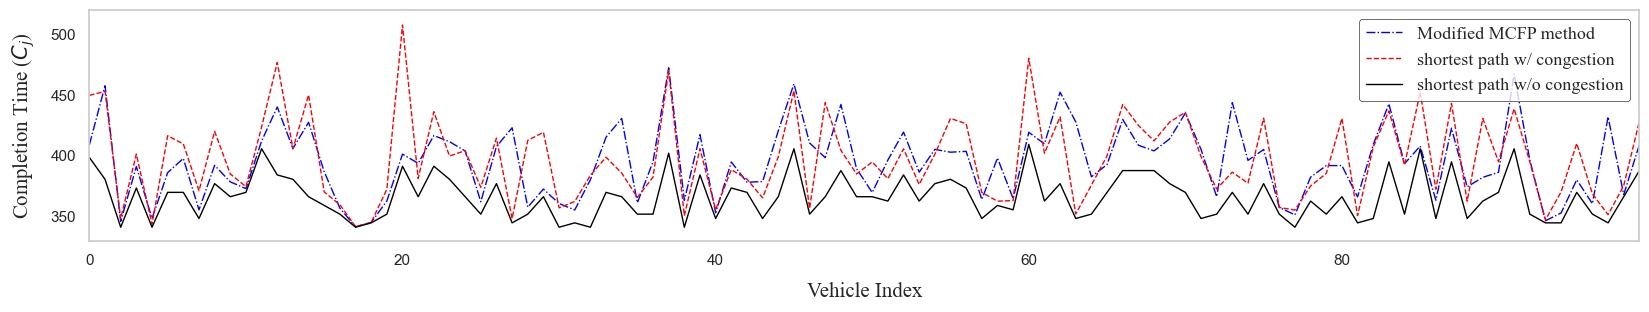

In [179]:
figsize = (20, 3)
ylim = (330, 520)

random_yt_num = 100
_random_state = 13
# yt_40_df = yt_40_df.sample(n=random_yt_num, random_state=_random_state).reset_index()
yt_60_df = concat_df[(concat_df['Prev Truck Number'] == '30') & (concat_df['Now Truck Number'] == '30')]
yt_60_df = yt_60_df.sample(n=random_yt_num, random_state=_random_state).reset_index()

completion_time_plot(yt_60_df, 'Vehicle Index', 'Completion Time ($C_j$)', figsize, ylim, random_yt_num, 'upper right','')

In [31]:
yt_60_df = concat_df[(concat_df['Prev Truck Number'] == '30') & (concat_df['Now Truck Number'] == '30')]
yt_60_df = yt_60_df.sample(n=random_yt_num, random_state=5).reset_index()

In [41]:
yt_60_df = concat_df[(concat_df['Prev Truck Number'] == '30') & (concat_df['Now Truck Number'] == '30')]
yt_60_df = yt_60_df[(yt_60_df['Completion_Time_LP'] - yt_60_df['Completion_Time_shortest']) <= 50]

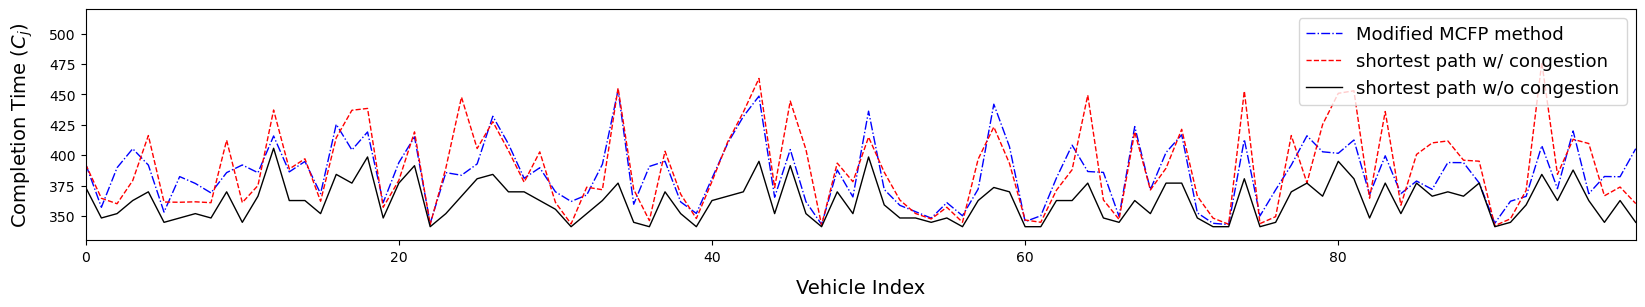

In [42]:
figsize = (20, 3)
ylim = (330, 520)
completion_time_plot(yt_60_df.sample(n=random_yt_num, random_state=1).reset_index(), 'Vehicle Index', 'Completion Time ($C_j$)', figsize, ylim, random_yt_num, 'upper right','')

### 10, 30, 50대 일때 Completion time

In [ ]:
yt_10_df = concat_df[(concat_df['Prev Truck Number'] == '5') & (concat_df['Now Truck Number'] == '5')]
yt_30_df = concat_df[(concat_df['Prev Truck Number'] == '15') & (concat_df['Now Truck Number'] == '15')]
yt_50_df = concat_df[(concat_df['Prev Truck Number'] == '25') & (concat_df['Now Truck Number'] == '25')]

random_num = 100

yt_10_random_df = yt_10_df.sample(n=random_num, random_state = 1).reset_index()
yt_30_random_df = yt_30_df.sample(n=random_num, random_state = 1).reset_index()
yt_50_random_df = yt_50_df.sample(n=random_num, random_state = 1).reset_index()

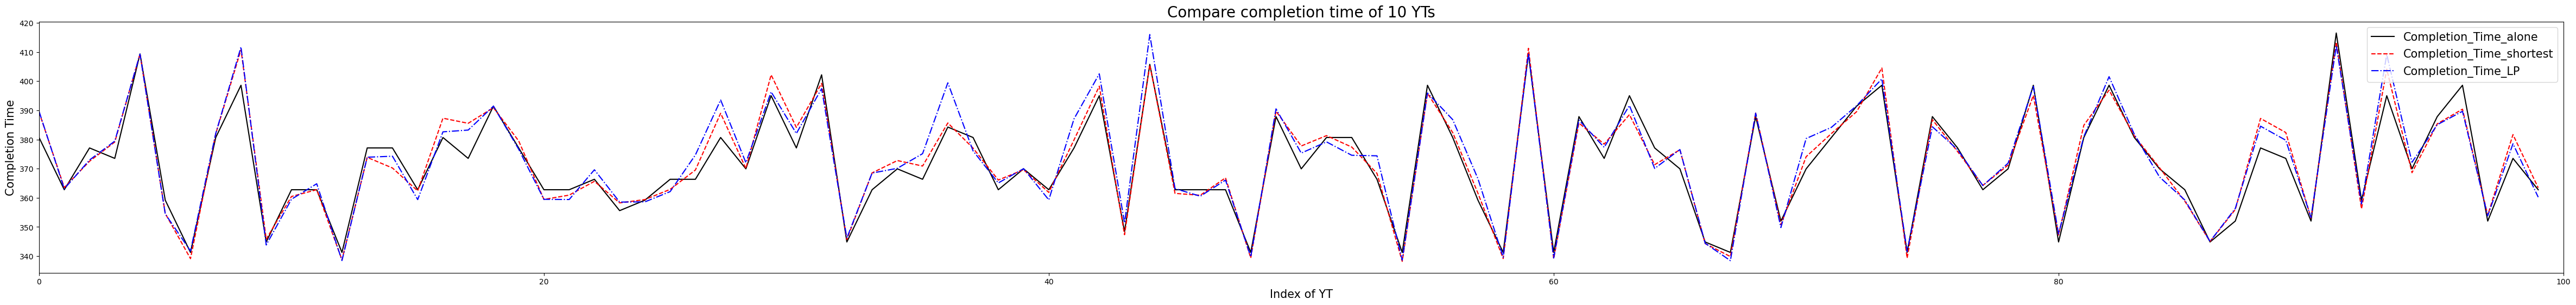

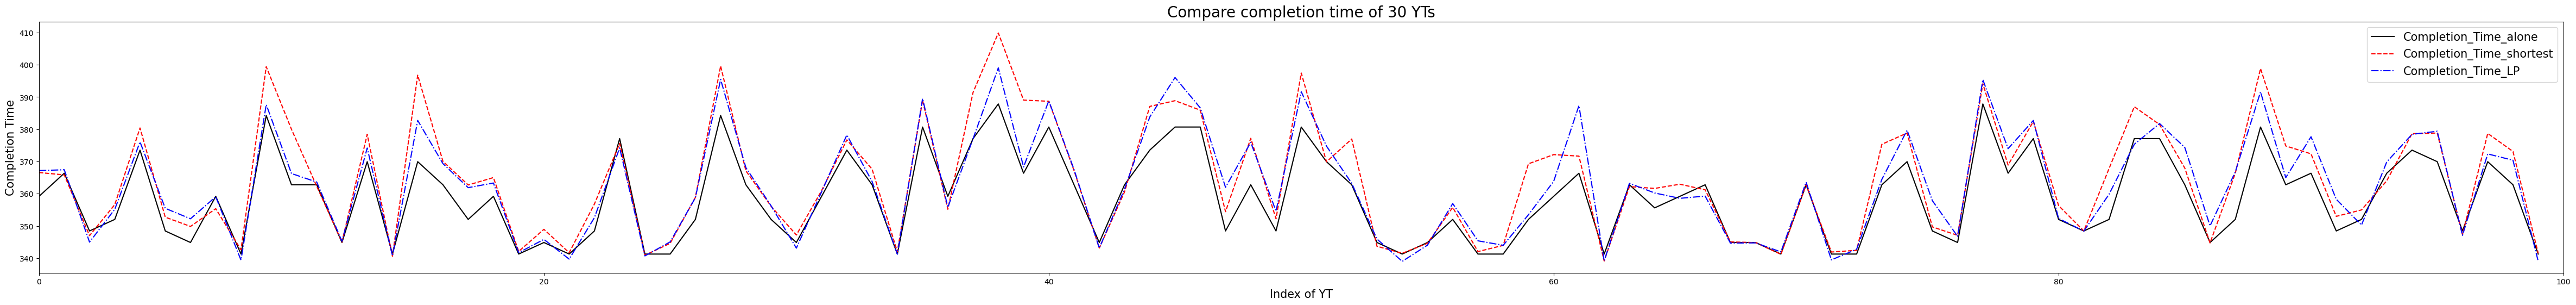

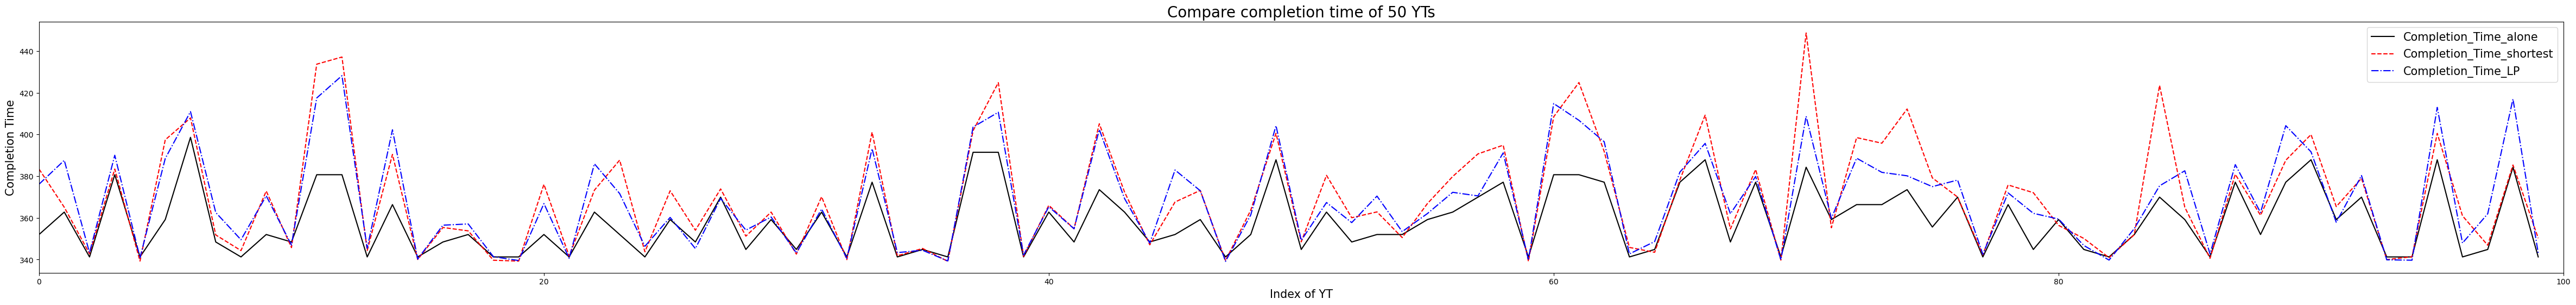

In [ ]:
x_label = 'Index of YT'
y_label = 'Completion Time'
title = 'Compare completion time'

completion_time_plot(yt_10_random_df, x_label, y_label, title + ' of 10 YTs', random_num)
completion_time_plot(yt_30_random_df, x_label, y_label, title + ' of 30 YTs', random_num)
completion_time_plot(yt_50_random_df, x_label, y_label, title + ' of 50 YTs', random_num)

In [ ]:
_y_col = ['Congestion_ratio','Completion_Time']
c_dfs = f.get_dfs_by_folder(folder_path, _y_col, True, _y_col[0])
c_dfs

Remove outliers by  Congestion_ratio !


[('prev_5_now_5',
       Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
  0                    5                5        0        0      100   
  1                    5                5        0        0      100   
  2                    5                5        0        0      100   
  3                    5                5        0        0      100   
  4                    5                5        0        0      100   
  ...                ...              ...      ...      ...      ...   
  6376                 5                5       80       10       10   
  6377                 5                5       80       10       10   
  6378                 5                5       80       10       10   
  6379                 5                5       80       10       10   
  6380                 5                5       80       10       10   
  
        repeat_num  Congestion_ratio Completion_Time  
  0              1         -0.030833         339.992  
  1  

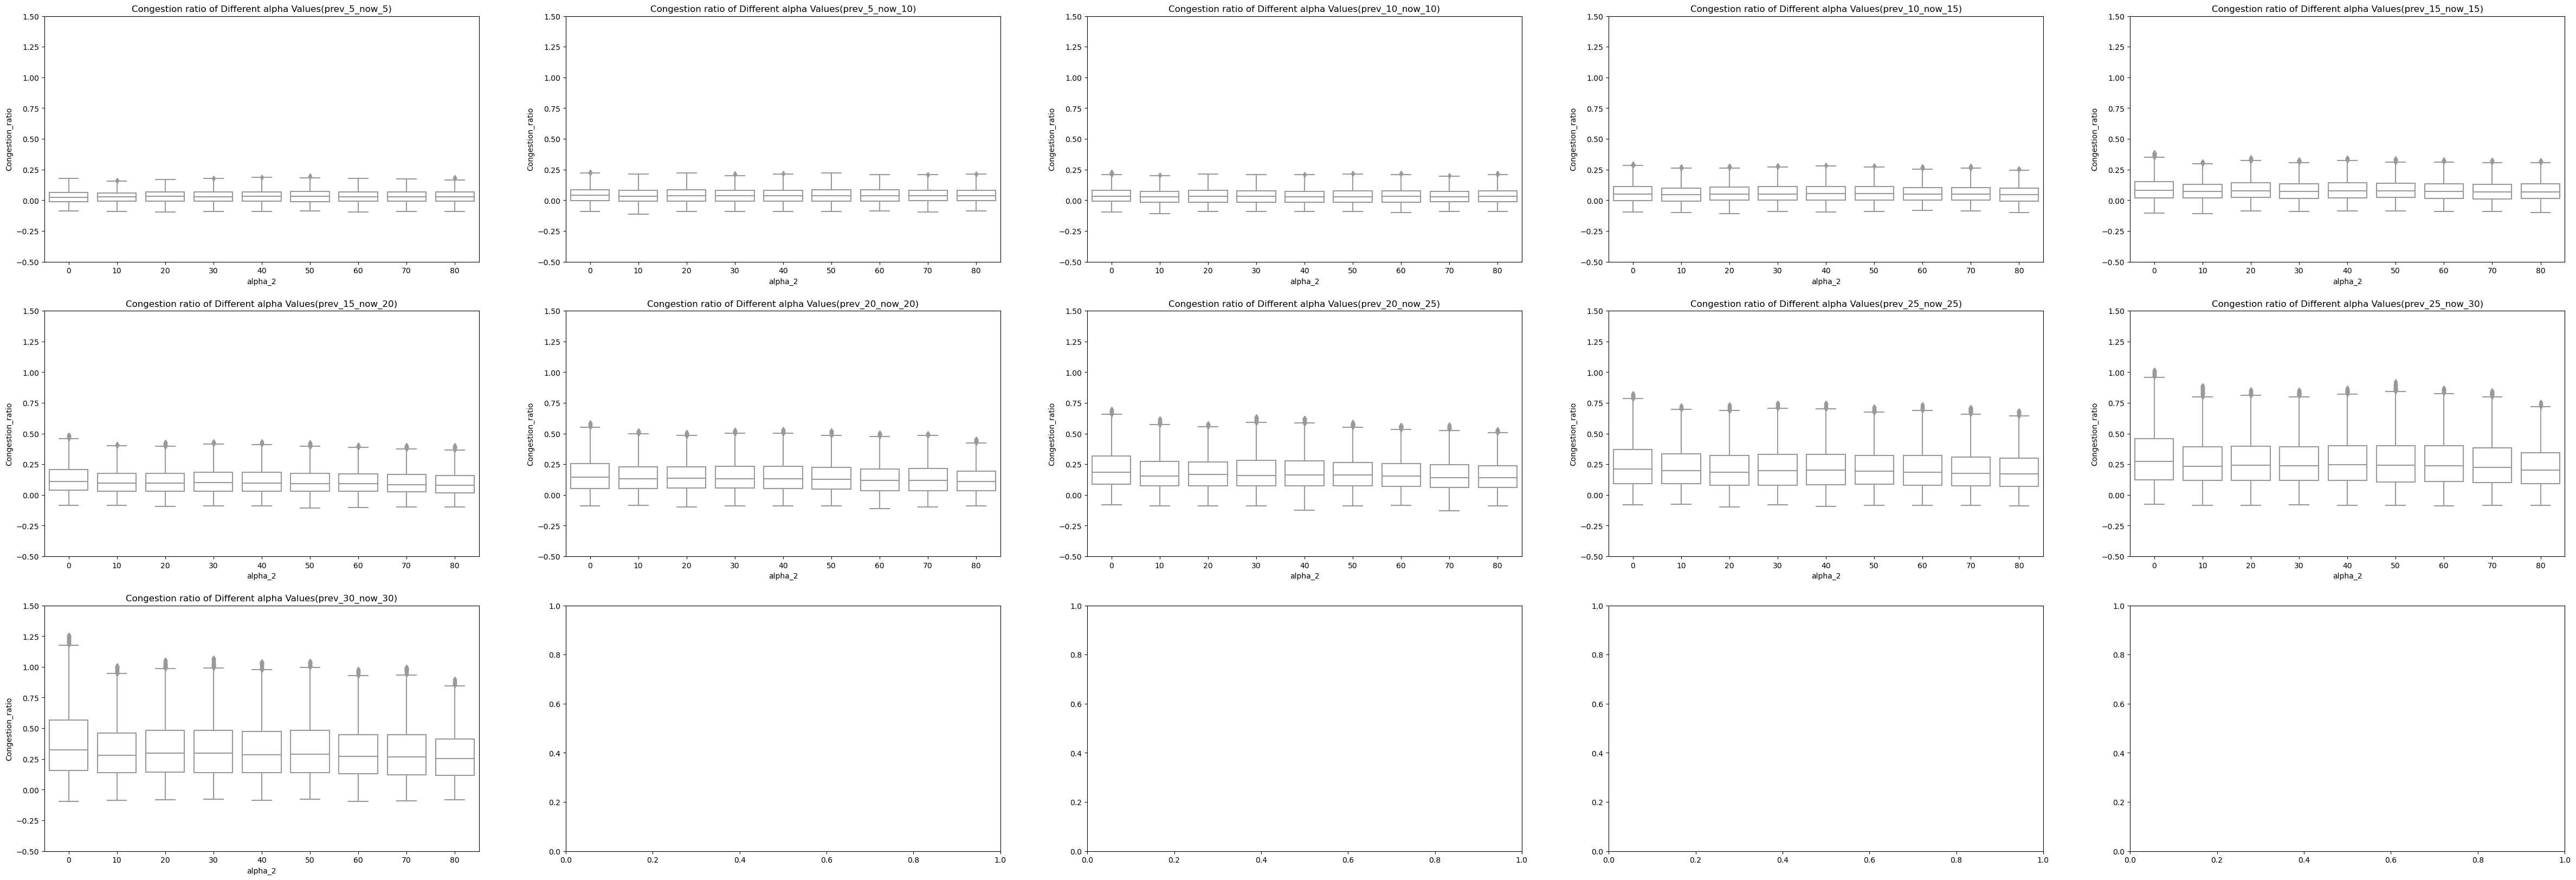

In [ ]:
new_completion_dfs = f.to_numeric(c_dfs, 'Congestion_ratio')
title = 'Congestion ratio of Different alpha Values'
fig_size = (60, 20)
y_lim = (-0.5, 1.5)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Congestion_ratio', col_num, y_lim, title, fig_size)

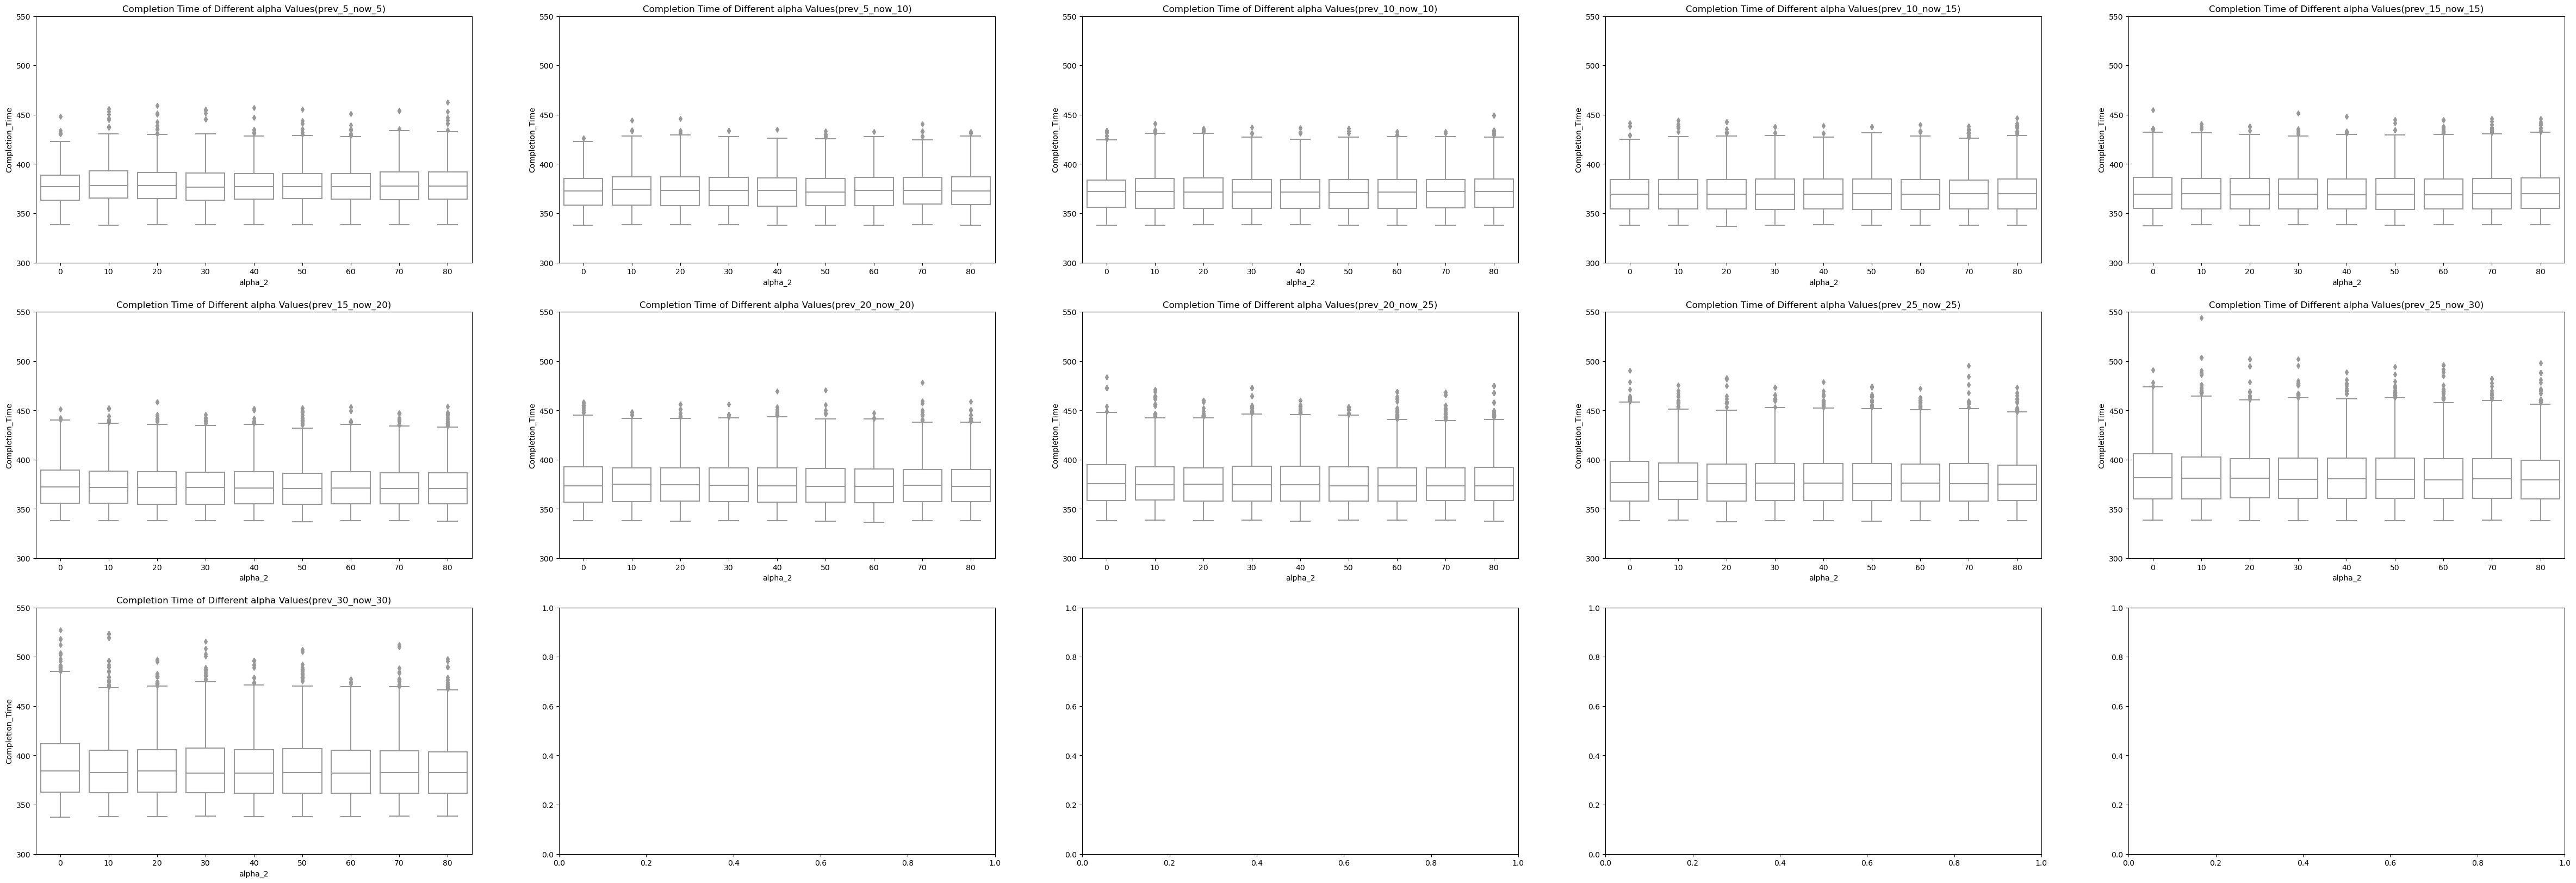

In [ ]:
new_completion_dfs = f.to_numeric(c_dfs, 'Completion_Time')
title = 'Completion Time of Different alpha Values'
fig_size = (60, 20)
y_lim = (300, 550)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Completion_Time', col_num, y_lim, title, fig_size)

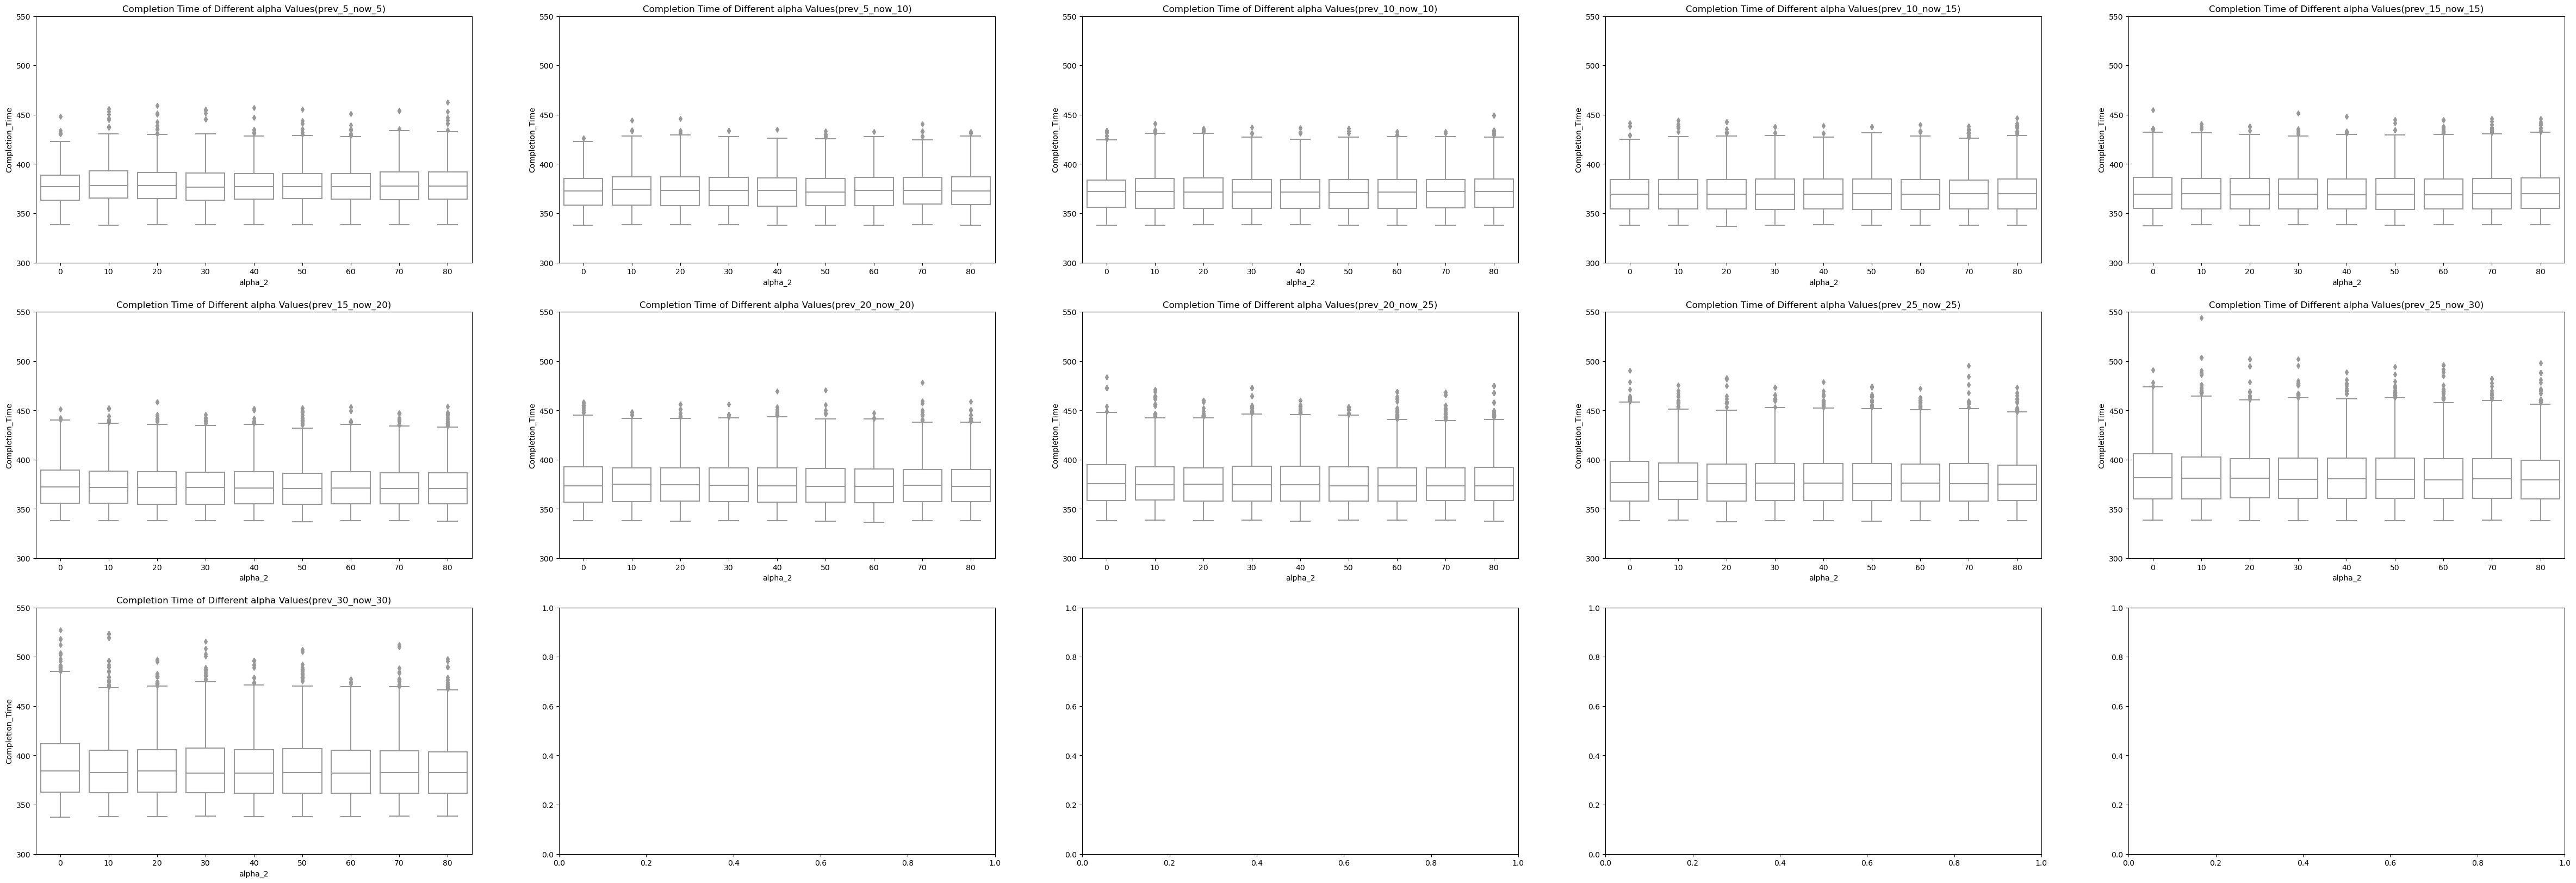

In [ ]:
new_completion_dfs = f.to_numeric(completion_dfs, 'Completion_Time')
title = 'Completion Time of Different alpha Values'
fig_size = (60, 20)
y_lim = (300, 550)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Completion_Time', col_num, y_lim, title, fig_size)

min :  -0.02141301 max :  0.08137266
min :  -0.00988983 max :  0.102573
min :  0.008598832 max :  0.1048616
min :  0.01331389 max :  0.12797
min :  0.03474983 max :  0.1949623
min :  0.06808501 max :  0.2458637
min :  0.1046267 max :  0.3288693
min :  0.1287529 max :  0.4139599
min :  0.1806052 max :  0.3829392
min :  0.2286355 max :  0.4311388
min :  0.2462635 max :  0.5731369


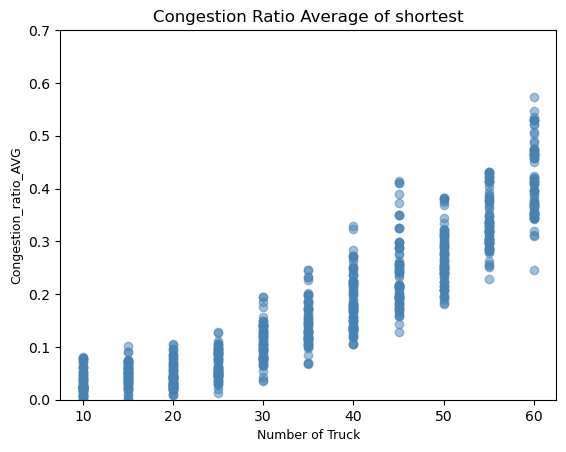

In [ ]:
x_col = ['Prev Truck Number', 'Now Truck Number']
y_lim = (0, 0.7)
_y_col = ['Congestion_ratio_AVG']
x_value = []
shortest_dfs = {}
x_label = 'Number of Truck'
legend_loc = 'upper left'
title = 'Congestion Ratio Average of shortest'

for key, value in congestion_ratio_avg_dfs:
    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]

    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    print('min : ', shortest_df[_y_col[0]].min(), 'max : ', shortest_df[_y_col[0]].max())
    
f.scatterplot(shortest_dfs, x_value, x_label, _y_col[0], y_lim, title, 'steelblue', False, legend_loc)

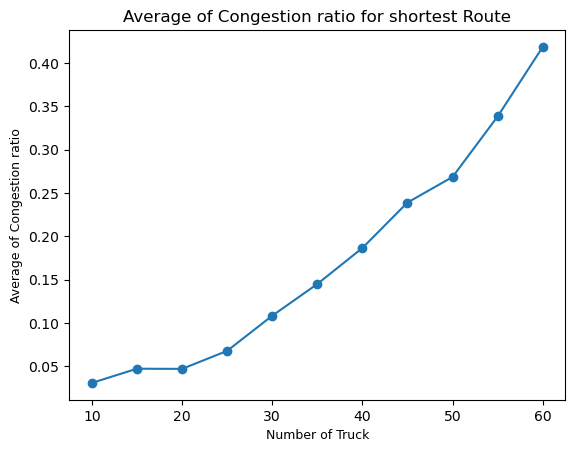

In [ ]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio_AVG'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Average of Congestion ratio for shortest Route')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()

In [ ]:
folder_path = 'Results'

title = 'Congestion ratio of shortest Route'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
_y_col = ['Congestion_ratio']
y_lim = (0, 1.4)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier=_y_col[0])
dfs = f.to_numeric(dfs, _y_col[0])
x_value = []
shortest_dfs = {}
# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]
    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    
    print('min : ', shortest_df[_y_col[0]].min(), 'max : ', shortest_df[_y_col[0]].max())
    
# f.scatterplot(shortest_dfs, x_value, x_label, _y_col[0], y_lim, title, 'steelblue', False, legend_loc)

Remove outliers by  Congestion_ratio !
min :  -0.08917192 max :  0.1756003
min :  -0.09343517 max :  0.2226633
min :  -0.09697974 max :  0.2251718
min :  -0.09546259 max :  0.2964902
min :  -0.1049242 max :  0.3756797
min :  -0.08636567 max :  0.4868526
min :  -0.08924523 max :  0.5957747
min :  -0.08222047 max :  0.6889742
min :  -0.081784 max :  0.8397203
min :  -0.07635883 max :  1.025648
min :  -0.0948113 max :  1.266309


### 전처리

In [60]:
import function as f

folder_path = '../Simulation/Assets/Results/Modify_prior_congestion'

title = 'Congestion ratio of shortest Route'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
_y_col = ['Congestion_ratio']
y_lim = (0, 1.4)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier=_y_col[0])
dfs = f.to_numeric(dfs, _y_col[0])

new_dfs = {}

# remove that congestion ratio is under 0
for key, value in dfs:
    new_dfs[key] = value[value['Congestion_ratio'] >= 0]

Remove outliers by  Congestion_ratio !


In [61]:
_y_col = ['Congestion_ratio']

shortest_dfs = {}
x_values = []

for key, value in new_dfs.items():
    shortest_df = value[value['alpha_1'] == 0]
    shortest_dfs[key] = shortest_df
    x_values.append(shortest_df[x_col].iloc[0].astype(int).sum())
    
    print(key, ' --> ' , 'min : ', shortest_df[_y_col[0]].min(), 'max : ', shortest_df[_y_col[0]].max())

prev_5_now_5  -->  min :  0.0004264429 max :  0.2302707
prev_5_now_10  -->  min :  4.727467e-05 max :  0.227372
prev_10_now_10  -->  min :  0.0006674595 max :  0.2754084
prev_10_now_15  -->  min :  0.0001633096 max :  0.3344968
prev_15_now_15  -->  min :  0.0004405989 max :  0.4072226
prev_15_now_20  -->  min :  0.0001442926 max :  0.5055849
prev_20_now_20  -->  min :  0.0001273097 max :  0.6431933
prev_20_now_25  -->  min :  0.0001841375 max :  0.7980013
prev_25_now_25  -->  min :  0.0005739012 max :  0.9550667
prev_25_now_30  -->  min :  0.0003801356 max :  1.077743
prev_30_now_30  -->  min :  0.0001000305 max :  1.288846


In [62]:
def scatterplot(_dfs, _x_value, x_label, y_col, y_lim, _title, _color, _legend, legend_loc):

    x_index = 0
    keys = []

    for key, value in _dfs.items():
        x_value = _x_value[x_index]
        y_value = value[y_col]
        keys.append(key)
        plt.scatter([x_value] * len(y_value), y_value, label=key, alpha = 0.05, color = _color)
        
        x_index += 1
        
    # # set y limit
    plt.ylim(y_lim)    
    plt.title(_title)
    plt.xlabel(x_label, fontsize = 9)
    plt.ylabel(y_col, fontsize = 9)
    if _legend == True:
        plt.legend(keys, fontsize = 7, loc = legend_loc)

    plt.show()

In [63]:
# x_index = 0
# keys = []

# for key, value in shortest_dfs.items():
#     x_value = x_values[x_index]
#     y_value = value['Congestion_ratio']
#     keys.append(key)

#     # Box plot
#     plt.boxplot(y_value, positions=[x_value], widths=2, showfliers=False)
                
#     x_index += 1
# # Set y limit
# # plt.ylim(y_lim)
# # plt.title(title)
# plt.xlim(8, 62)
# plt.xlabel('X Values', fontsize=9)
# plt.ylabel('Congestion Ratio', fontsize=9)
      
# plt.show()

In [64]:
# ignore error
import warnings
warnings.filterwarnings('ignore')

In [65]:
for df_name, df in shortest_dfs.items():
    df['YT Num'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])

In [66]:
# Concatenate DataFrames along the rows
merged_df = pd.concat(shortest_dfs.values(), ignore_index=True)
merged_df

Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                     5                5        0        0      100   
1                     5                5        0        0      100   
2                     5                5        0        0      100   
3                     5                5        0        0      100   
4                     5                5        0        0      100   
...                 ...              ...      ...      ...      ...   
20439                30               30        0        0      100   
20440                30               30        0        0      100   
20441                30               30        0        0      100   
20442                30               30        0        0      100   
20443                30               30        0        0      100   

       repeat_num  Congestion_ratio  YT Num  
0               1          0.094347      10  
1               1          0.012579      10  
2               1          0.185604      10  
3               1          0.070787      10  
4               1          0.125462      10  
...           ...               ...     ...  
20439          60          0.252638      60  
20440          60          0.600488      60  
20441          60          0.705686      60  
20442          60          0.457834      60  
20443          60          0.593337      60  

[20444 rows x 8 columns]

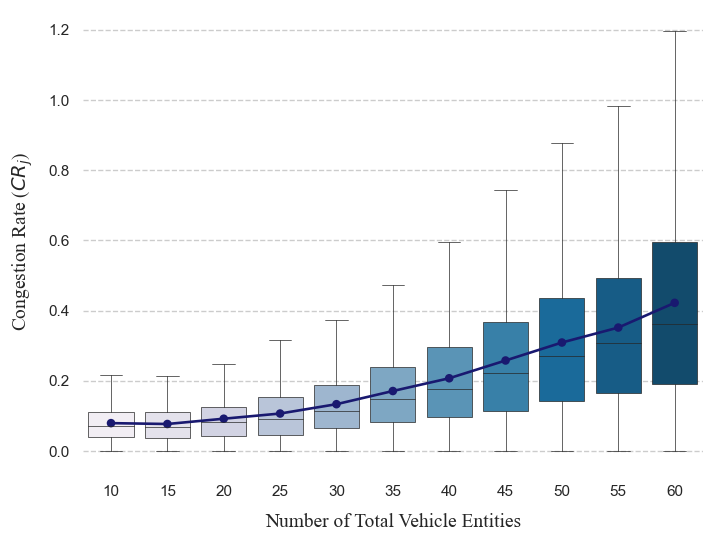

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your dataframe
# Replace 'YT Num' with 'Congestion_ratio'
x_col = 'YT Num'
y_col = 'Congestion_ratio'

# Compute the average Congestion_ratio for each YT_Num
avg_congestion_ratio = merged_df.groupby(x_col)[y_col].mean().reset_index()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Remove graph spines
sns.despine(left=True, bottom=True)

# Change the y-axis grid to dashed lines
ax.yaxis.grid(True, linestyle='dashed')

sns.set_theme(style="whitegrid")

# Draw the boxplot without individual data points
# sns.boxplot(data=merged_df, x=x_col, y=y_col, palette="Blues", showfliers=False, linewidth=0.5)
sns.boxplot(data=merged_df, x=x_col, y=y_col, palette="PuBu", showfliers=False, linewidth=0.5)

# Overlay a pointplot with the average values
sns.pointplot(data=avg_congestion_ratio, x=x_col, y=y_col, color='midnightblue', markers='o', linestyles='-', scale=0.7)

# Add title and labels
# plt.title('Distribution of Congestion Ratio by YT Num with Average Line')
plt.xlabel('Number of Total Vehicle Entities', fontsize=14, font = 'Times New Roman', labelpad=10)
plt.ylabel('Congestion Rate ($CR_j$)', fontsize = 14, font = 'Times New Roman', labelpad=10)

# Show the plot
plt.show()


### Average of Congestion ratio

In [70]:
all_df = pd.DataFrame()
for key, value in new_dfs.items():
    value['YT Num'] = int(value['Prev Truck Number'].unique()[0]) + int(value['Now Truck Number'].unique()[0])
    all_df = pd.concat([all_df, value], ignore_index=True)

print(all_df)

       Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                      5                5        0        0      100   
1                      5                5        0        0      100   
2                      5                5        0        0      100   
3                      5                5        0        0      100   
4                      5                5        0        0      100   
...                  ...              ...      ...      ...      ...   
183848                30               30       80       10       10   
183849                30               30       80       10       10   
183850                30               30       80       10       10   
183851                30               30       80       10       10   
183852                30               30       80       10       10   

        repeat_num  Congestion_ratio  YT Num  
0                1          0.094347      10  
1                1          0.012579     

In [71]:
cr_avg_df = all_df.groupby(['YT Num', 'alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio'].mean().reset_index()

# change column name 'congestion_ratio' to 'AVG of Congestion rates'
cr_avg_df = cr_avg_df.rename(columns={'Congestion_ratio': 'AVG of Congestion rates'})

# divide by 100 for each alpah_1, alpha_2, alpha_3
cr_avg_df['alpha_1'] = cr_avg_df['alpha_1'] / 100
cr_avg_df['alpha_2'] = cr_avg_df['alpha_2'] / 100
cr_avg_df['alpha_3'] = cr_avg_df['alpha_3'] / 100

cr_avg_df

YT Num  alpha_1  alpha_2  alpha_3  AVG of Congestion rates
0       10      0.0      0.0      1.0                 0.079177
1       10      0.1      0.8      0.1                 0.075960
2       10      0.2      0.7      0.1                 0.077782
3       10      0.3      0.6      0.1                 0.079760
4       10      0.4      0.5      0.1                 0.075063
..     ...      ...      ...      ...                      ...
94      60      0.4      0.5      0.1                 0.387864
95      60      0.5      0.4      0.1                 0.412074
96      60      0.6      0.3      0.1                 0.425831
97      60      0.7      0.2      0.1                 0.418583
98      60      0.8      0.1      0.1                 0.400095

[99 rows x 5 columns]

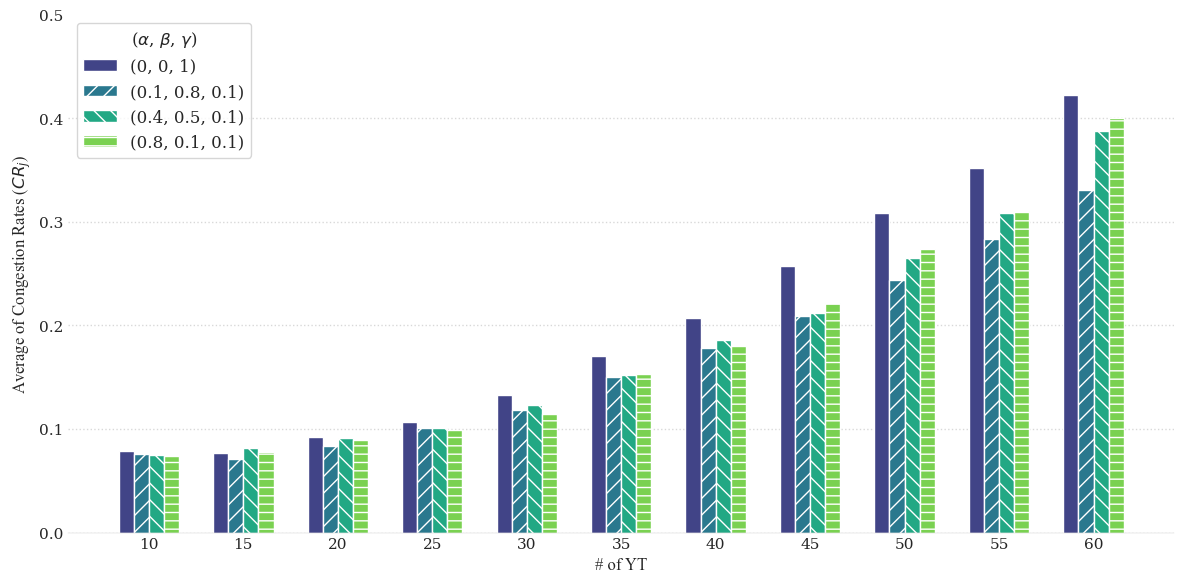

In [73]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = cr_avg_df.copy()

# Define alpha values
alpha_values = [[0, 0.1, 0.4, 0.8],
                [0, 0.8, 0.5, 0.1],
                [1, 0.1, 0.1, 0.1]]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['YT Num'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['AVG of Congestion rates'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('# of YT', fontweight='ultralight', font = 'Times New Roman')
ax.set_ylabel('Average of Congestion Rates ($CR_j$)', fontweight='ultralight', font = 'Times New Roman')
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.5)
ax.set_xticks(np.arange(10, 65, 5))
# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size
ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 12})

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)
 
# Show the plot
plt.tight_layout()
plt.show()

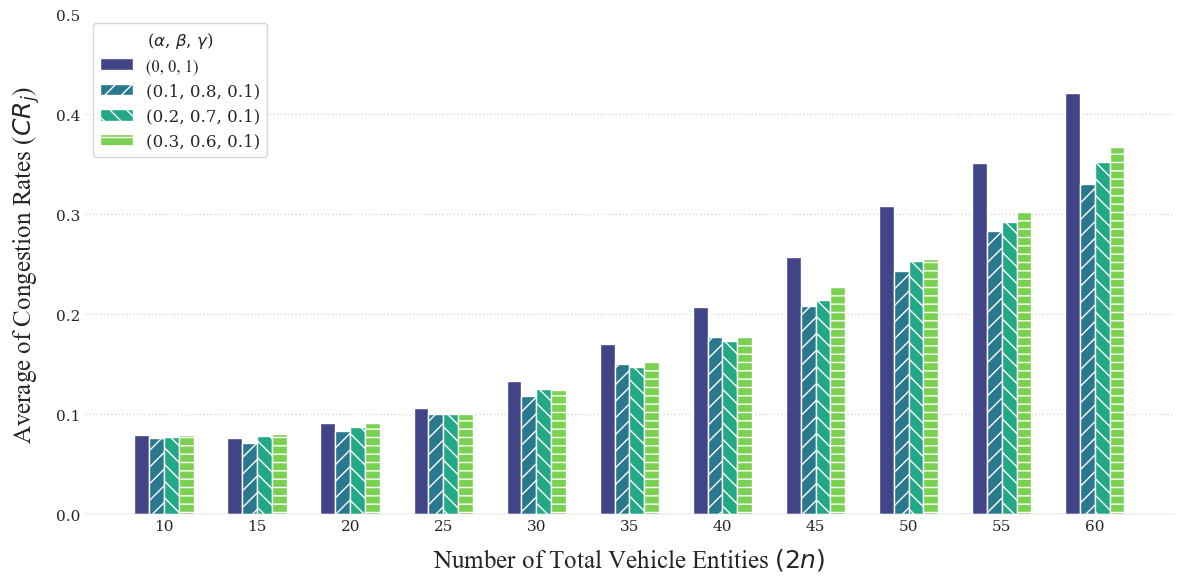

In [180]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = cr_avg_df.copy()

# Define alpha values
alpha_values = [[0, 0.1, 0.2, 0.3],
                [0, 0.8, 0.7, 0.6],
                [1, 0.1, 0.1, 0.1]]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['YT Num'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['AVG of Congestion rates'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('Number of Total Vehicle Entities $(2n)$', fontsize = 18, fontweight='ultralight', font='Times New Roman', labelpad=10)
ax.set_ylabel('Average of Congestion Rates ($CR_j$)', fontsize = 18, fontweight='ultralight', font='Times New Roman', labelpad=10)
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.5)
ax.set_xticks(np.arange(10, 65, 5))
# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size and set Times New Roman
legend = ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 12}, loc='upper left')
legend.get_title().set_fontsize(12)  # Set title font size
legend.get_texts()[0].set_fontfamily('Times New Roman')  # Set legend text font family

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


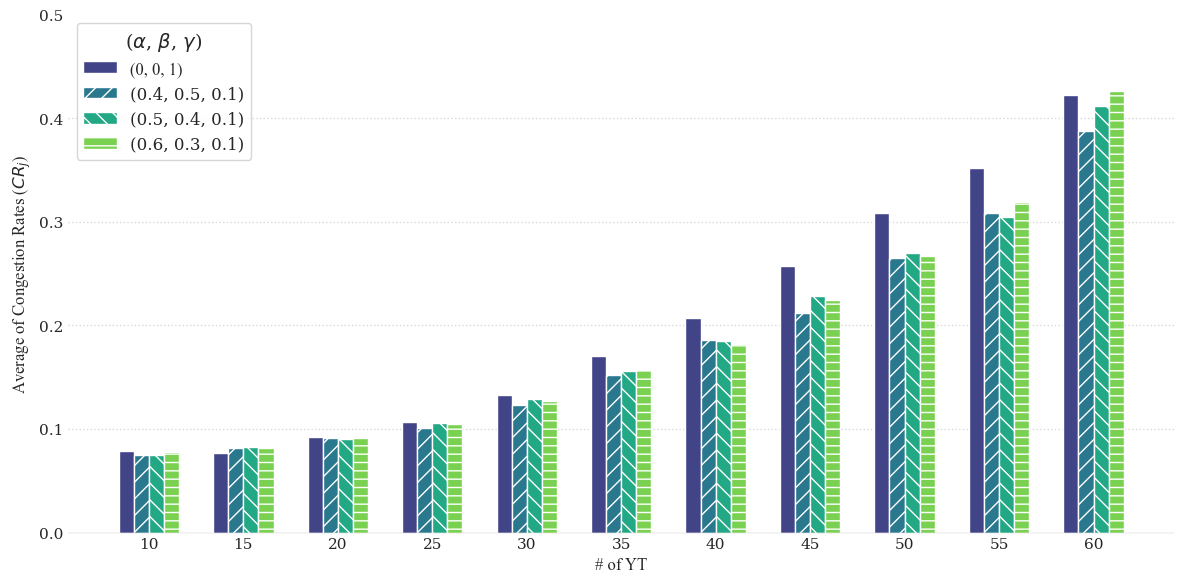

In [80]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = cr_avg_df.copy()

# Define alpha values
alpha_values = [[0, 0.4, 0.5, 0.6],
                [0, 0.5, 0.4, 0.3],
                [1, 0.1, 0.1, 0.1]]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['YT Num'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['AVG of Congestion rates'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('# of YT', fontweight='ultralight', font='Times New Roman')
ax.set_ylabel('Average of Congestion Rates ($CR_j$)', fontweight='ultralight', font='Times New Roman')
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.5)
ax.set_xticks(np.arange(10, 65, 5))
# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size and set Times New Roman
legend = ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 12}, loc='upper left')
legend.get_title().set_fontsize(14)  # Set title font size
legend.get_texts()[0].set_fontfamily('Times New Roman')  # Set legend text font family

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


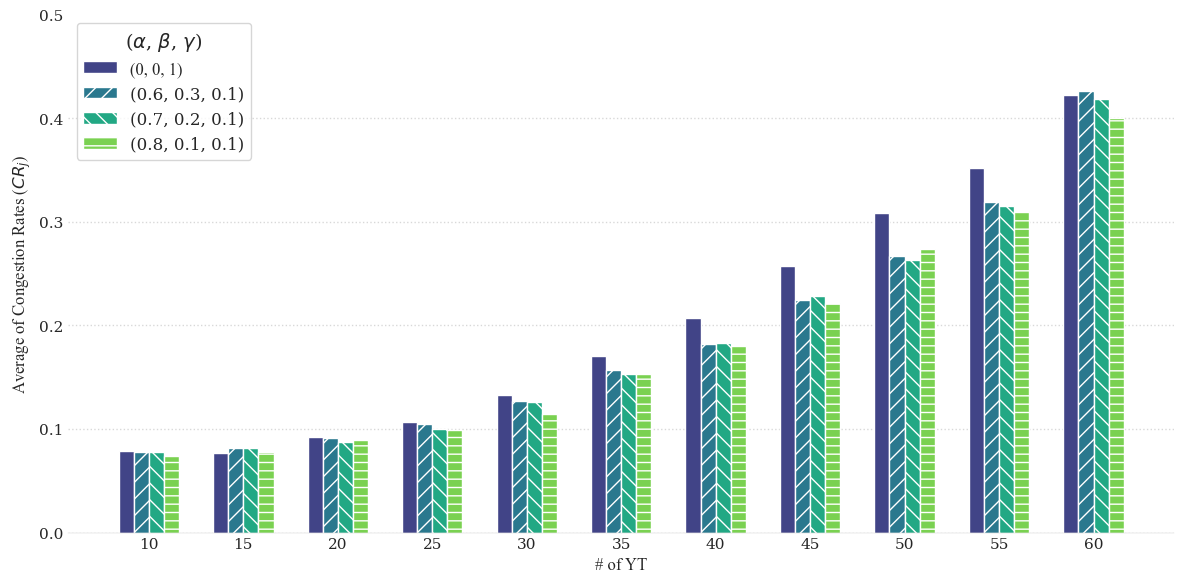

In [81]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = cr_avg_df.copy()

# Define alpha values
alpha_values = [[0, 0.6, 0.7, 0.8],
                [0, 0.3, 0.2, 0.1],
                [1, 0.1, 0.1, 0.1]]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['YT Num'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['AVG of Congestion rates'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('# of YT', fontweight='ultralight', font='Times New Roman')
ax.set_ylabel('Average of Congestion Rates ($CR_j$)', fontweight='ultralight', font='Times New Roman')
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.5)
ax.set_xticks(np.arange(10, 65, 5))
# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size and set Times New Roman
legend = ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 12}, loc='upper left')
legend.get_title().set_fontsize(14)  # Set title font size
legend.get_texts()[0].set_fontfamily('Times New Roman')  # Set legend text font family

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio'].mean())

# draw line plot
plt.plot(x_values, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Congestion ratio AVG of shortest')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()

NameError: name 'shortest_dfs' is not defined

In [26]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Congestion ratio AVG of shortest')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()
        

NameError: name 'shortest_dfs' is not defined

In [ ]:
# title = 'Congestion ratio average of LP'

# x_col = ['Prev Truck Number', 'Now Truck Number']
# y_col = ['Congestion_ratio']
# y_lim = (0, 0.5)

# dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
# dfs = f.to_numeric(dfs, y_col[0])
# print(dfs)

In [ ]:
# folder_path = 'results'
# x_col = 'alpha_1'
# y_col = ['Congestion_ratio', 'Completion_Time']
# col_num = 5
# y_lim = (300, 500)
# fig_size = (60, 20)
# title = 'Completion time by alpha_1'

# remove_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
# remove_df = f.to_numeric(remove_df, y_col[1])
# f.boxsubplot(remove_df, x_col, y_col[1], col_num, y_lim, title, fig_size)

In [ ]:
def lineplot_avg(_dfs, x_col_1, x_col_2, y_col, y_lim, _title):

    # Define a list of markers
    markers = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '+', '*']
    label_list = []
    # Use cycle to create a cycling iterator for markers
    marker_cycle = cycle(markers)
    
    for key, value in _dfs:
        
        # get average of group by alpha_1, alpha_2, alpha_3
        df = value.groupby([x_col_1, x_col_2])[y_col].mean().reset_index()
        x_value = df[x_col_1]
        y_value = df[y_col]
        
        # Get the next marker from the cycle
        marker = next(marker_cycle)
        label_name = int(value['Prev Truck Number'][0]) + int(value['Now Truck Number'][0])
        label_list.append(label_name)
        
        # Plot the line with the specified marker
        plt.plot(x_value[1:], y_value[1:], marker=marker, label=label_name)

    
    plt.title(_title, fontsize=12)
    plt.xlabel(x_col_1, fontsize=9)
    plt.ylabel(y_col, fontsize=9)
    plt.legend(label_list, title = 'Number of YT', title_fontsize = 6, fontsize=6, loc='upper right')
    # set y limit
    plt.ylim(y_lim)

    # Create a secondary x-axis
    ax2 = plt.gca().secondary_xaxis('top')
    
    # Customize the secondary x-axis using the values from the specific column
    if x_col_2 in df.columns:
        ax2.set_xlabel(x_col_2, fontsize=9)
        ax2.set_xticklabels(df[x_col_2])
    
    for key, value in _dfs:
        df = value.groupby([x_col_1])[y_col].mean().reset_index()
        y_value = df[y_col]
        plt.axhline(y=y_value[0], linestyle='--', color ='gray' ,alpha=0.5)
    
    plt.show()


In [ ]:
def lineplot_range(_dfs, x_col_1, x_col_2, y_col, col_num, y_lim, _figsize, _title):

    folder_num = len(_dfs)

    if folder_num % col_num == 0:
        row_num = folder_num // col_num
    else:
        row_num = folder_num // col_num + 1
        

    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=_figsize)

    for (key, value), ax in zip(_dfs, axes.ravel()):
        
        # Separate data based on x_col_1 being equal to 0 or not
        df_x0 = value[value[x_col_1] == 0].groupby([x_col_1, x_col_2])[y_col].agg(['mean', 'min', 'max']).reset_index()
        df_x_not0 = value[value[x_col_1] != 0].groupby([x_col_1, x_col_2])[y_col].agg(['mean', 'min', 'max']).reset_index()
        
        label_name = int(value["Prev Truck Number"].iloc[0]) + int(value["Now Truck Number"].iloc[0])
        
        # Plot the mean line with the specified line style and label for x_col_1!=0
        ax.plot(df_x_not0[x_col_1], df_x_not0['mean'], marker = 'o',label=label_name)
        # Plot the min and max values as a shaded region for x_col_1!=0
        ax.fill_between(df_x_not0[x_col_1], df_x_not0['min'], df_x_not0['max'], alpha=0.2, label=None)
        
        # Plot the min and max values as horizontal lines for x_col_1=0
        ax.axhline(y=df_x0['min'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='min')
        ax.axhline(y=df_x0['mean'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='mean')
        ax.axhline(y=df_x0['max'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='max')

        # set y limit
        ax.set_ylim(y_lim)
        
        ax.set_title(key, fontsize= 9)
    
    fig.suptitle(_title, fontsize= 12)

    # set x label
    fig.text(0.5, 0.04, x_col_1, ha='center', fontsize=12)
    # set y label
    fig.text(0.1, 0.5, y_col, va='center', rotation='vertical', fontsize=12)
    
    plt.show()

### Travel Time by Distance

In [ ]:
folder_path = 'Results'
_y_col = ['Congestion_ratio', 'TravelTime_by_Distance']

travel_df = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier = _y_col[0])
travel_df = f.to_numeric(travel_df, _y_col[1])

Remove outliers by  Congestion_ratio !


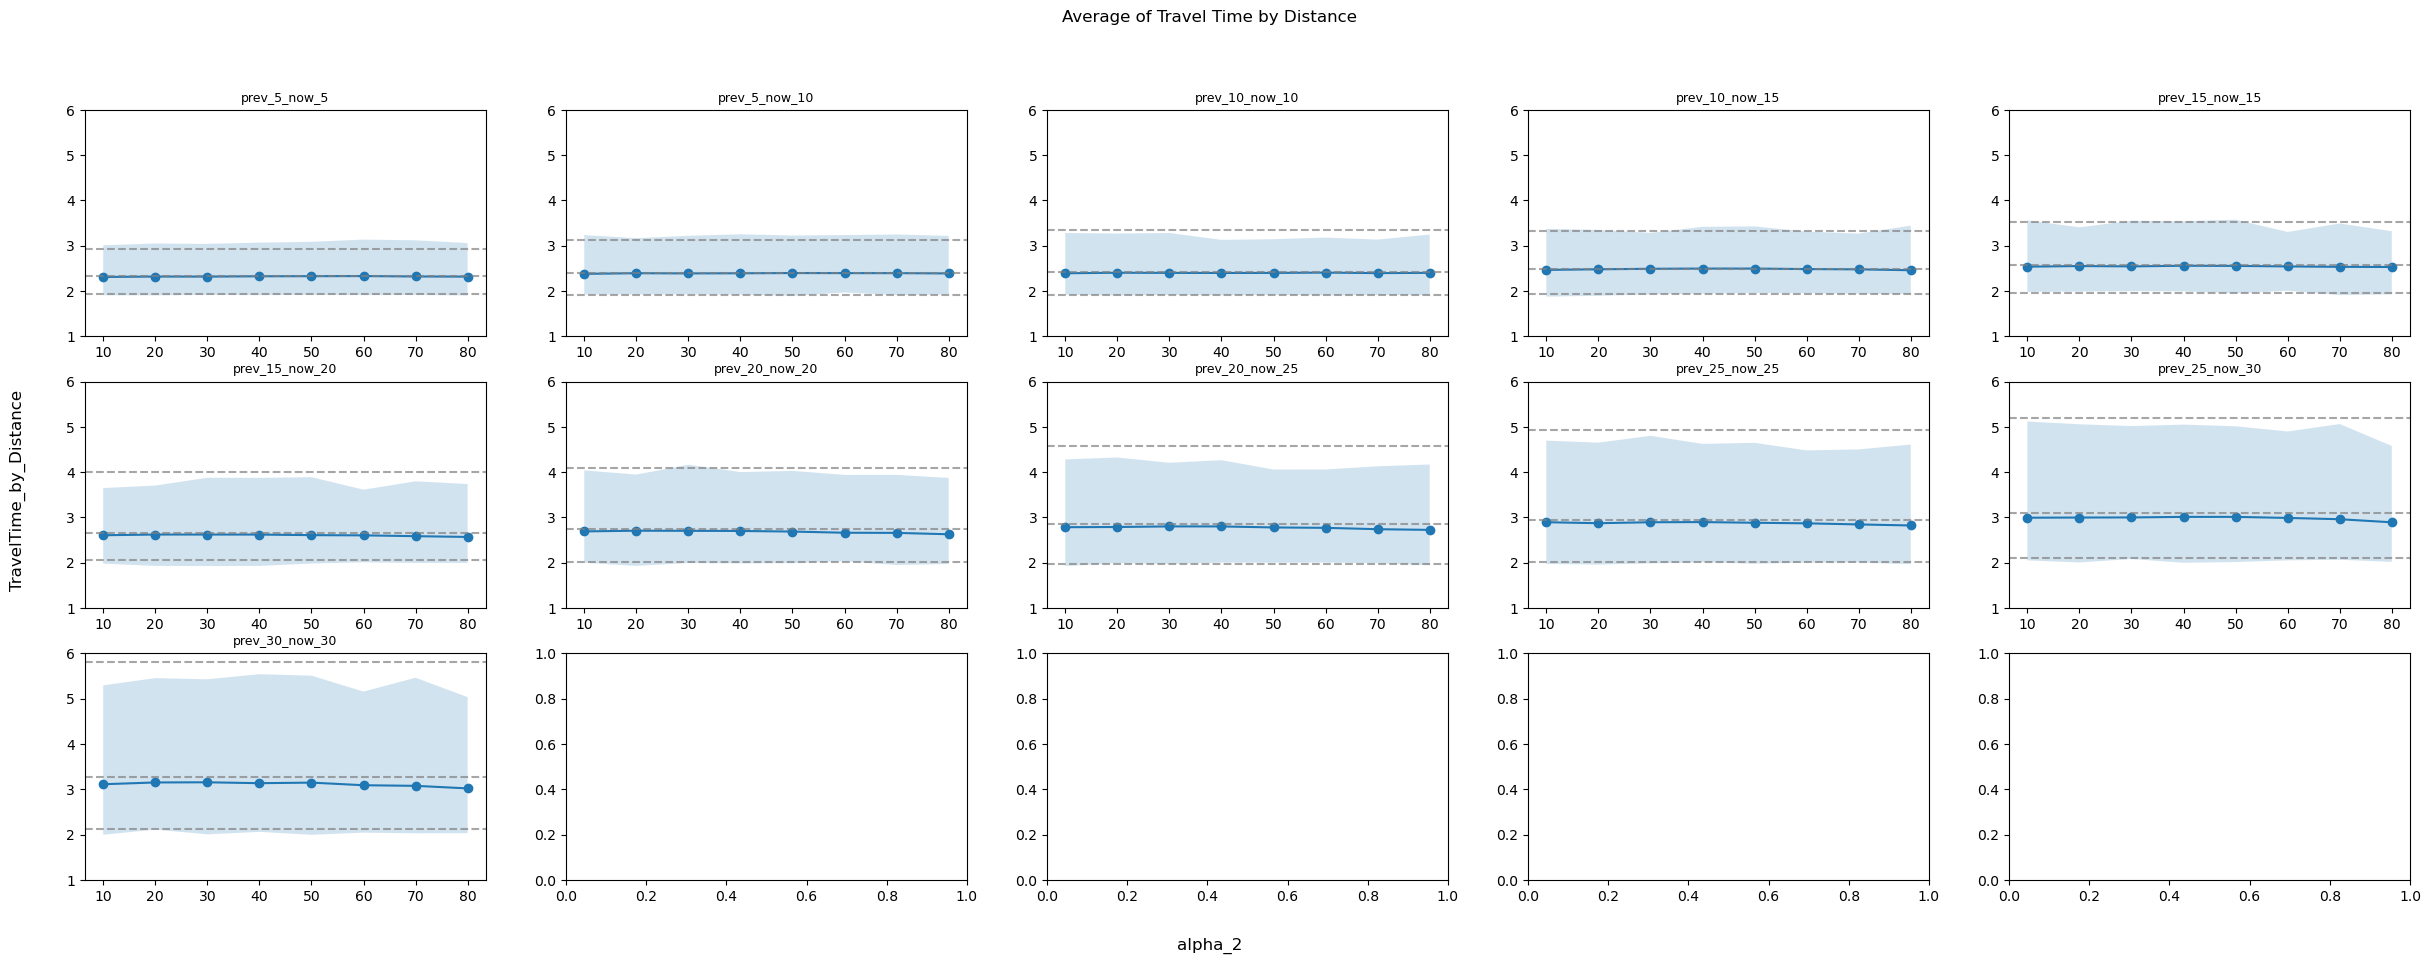

In [ ]:
x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
col_num = 5

y_lim = (1, 6)
title = 'Average of Travel Time by Distance'
fig_size = (30, 10)

lineplot_range(travel_df, x_col_1, x_col_2, _y_col[1], col_num, y_lim, fig_size, title)

In [ ]:
folder_path = 'Results'
_y_col = ['C_max_prev', 'C_max_now', 'C_max']

c_max_df = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier = _y_col[2])
c_max_df = f.to_numeric(c_max_df, _y_col[0])
c_max_df = f.to_numeric(c_max_df, _y_col[1])

for file_name, df in c_max_df:
    # add column
    df['Number of YT'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
print(c_max_df)

Remove outliers by  C_max !
[('prev_5_now_5',     Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
0                   5                5        0        0      100           1   
1                   5                5        0        0      100           2   
2                   5                5        0        0      100           3   
3                   5                5        0        0      100           4   
4                   5                5        0        0      100           5   
..                ...              ...      ...      ...      ...         ...   
611                 5                5       80       10       10          56   
612                 5                5       80       10       10          57   
613                 5                5       80       10       10          58   
614                 5                5       80       10       10          59   
615                 5                5       80       10       

In [ ]:
concat_df = pd.DataFrame()

for file_name, df in c_max_df:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    others_df = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # concat shortest_df and others_df and concat_df
    concat_df = pd.concat([concat_df, shortest_df, others_df], ignore_index=True)

print(concat_df)

     Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                    5                5        0        0      100   
1                    5                5        0        0      100   
2                    5                5        0        0      100   
3                    5                5        0        0      100   
4                    5                5        0        0      100   
...                ...              ...      ...      ...      ...   
1624                30               30       10       80       10   
1625                30               30       10       80       10   
1626                30               30       10       80       10   
1627                30               30       10       80       10   
1628                30               30       10       80       10   

      repeat_num  C_max_prev  C_max_now    C_max  Number of YT  
0              1     404.816    396.952  404.816            10  
1              2     430.392 

In [ ]:
def lineplot_range_2(_df, _x_col, y_col, _y_lim, _figsize, _title, _legend_loc):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = _figsize)
    
    _shortest_df = _df[_df['alpha_1'] == 0]
    _others_df = _df[_df['alpha_1'] != 0]
    
    # Plot for _shortest_df
    axes[0].set_title('C_max of Shortest', fontsize= 12)
    axes[1].set_title('C_max of LP', fontsize= 12)
    
    for y_col_i in y_col:
        _shortest_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[0], label= 'Mean of ' + y_col_i)
        _others_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[1], label= 'Mean of ' + y_col_i)
        
        mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
        min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
        max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

        mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
        min_others = _others_df.groupby(_x_col)[y_col_i].min()
        max_others = _others_df.groupby(_x_col)[y_col_i].max()

        axes[0].fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.2)
        axes[1].fill_between(mean_others.index, min_others, max_others, alpha=0.2)
    
    # Set common y-axis limits
    for ax in axes:
        ax.set_ylim(_y_lim)
        # ax.set_xlabel(_x_col)
        ax.set_ylabel('Completion Time')
        ax.legend(loc = _legend_loc, fontsize = 9)    
    
    plt.suptitle(_title)
    plt.show()
    

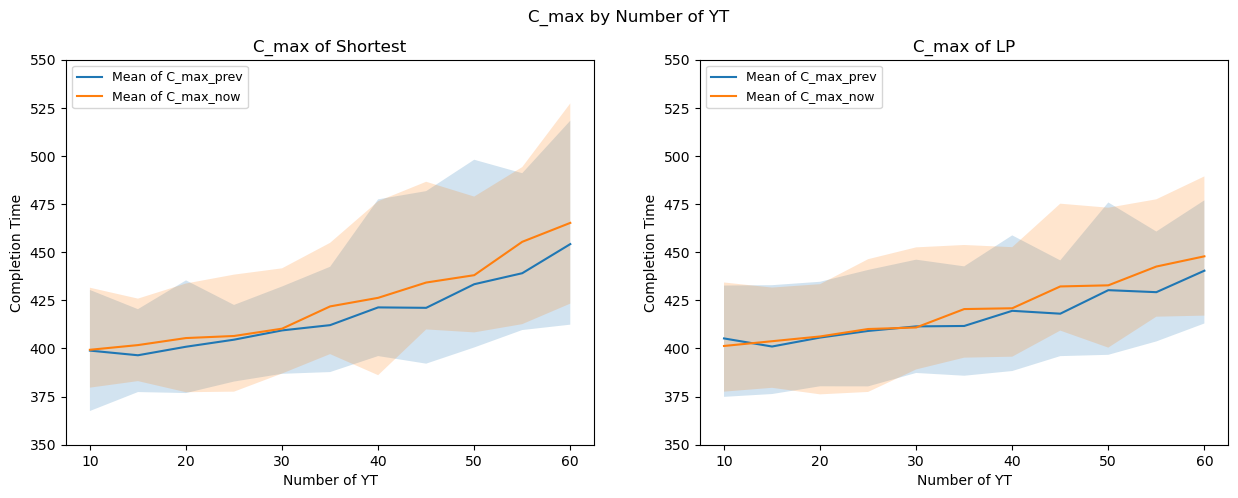

In [ ]:
x_col = 'Number of YT'
_y_col = ['C_max_prev', 'C_max_now']
y_lim = (350, 550)
fig_size = (15, 5)
title = 'C_max by Number of YT'
legend_loc = 'upper left'

lineplot_range_2(concat_df, x_col, _y_col, y_lim, fig_size, title, legend_loc)

In [ ]:
def lineplot_range_2(_df, _x_col, y_col, y_lim, _figsize, _title):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=_figsize)

    for (key, value), ax in zip(_df, axes.ravel()):
        
        # Separate data based on x_col_1 being equal to 0 or not
        df_x0 = value[value[_x_col] == 0].groupby(_x_col)[y_col].agg(['mean', 'min', 'max']).reset_index()
        df_x_not0 = value[value[_x_col] != 0].groupby(_x_col)[y_col].agg(['mean', 'min', 'max']).reset_index()
        
        
        # Plot the mean line with the specified line style and label for x_col_1!=0
        ax.plot(df_x_not0[_x_col], df_x_not0['mean'], marker = 'o')
        # Plot the min and max values as a shaded region for x_col_1!=0
        ax.fill_between(df_x_not0[_x_col], df_x_not0['min'], df_x_not0['max'], alpha=0.2, label=None)
        
        # Plot the min and max values as horizontal lines for x_col_1=0
        ax.axhline(y=df_x0['min'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='min')
        ax.axhline(y=df_x0['mean'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='mean')
        ax.axhline(y=df_x0['max'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='max')

        # set y limit
        ax.set_ylim(y_lim)
        
        ax.set_title(key, fontsize= 9)
    
    fig.suptitle(_title, fontsize= 12)

    # set x label
    fig.text(0.5, 0.04, _x_col, ha='center', fontsize=12)
    # set y label
    fig.text(0.1, 0.5, y_col, va='center', rotation='vertical', fontsize=12)
    
    plt.show()

In [ ]:
x_col = 'Number of YT'



C:\Users\USER\AppData\Local\Temp\ipykernel_23836\271525074.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df[x_col_2])


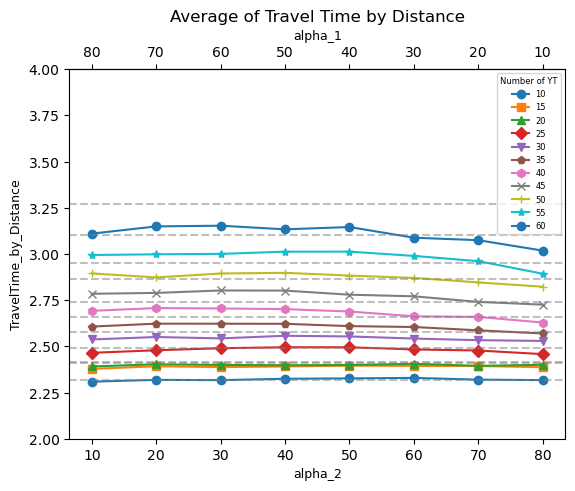

In [ ]:
x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
y_lim = (2, 4)
title = 'Average of Travel Time by Distance'

lineplot_avg(travel_df, x_col_1, x_col_2, _y_col[1], y_lim, title)

C:\Users\USER\AppData\Local\Temp\ipykernel_23836\2905998956.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df[x_col_2])


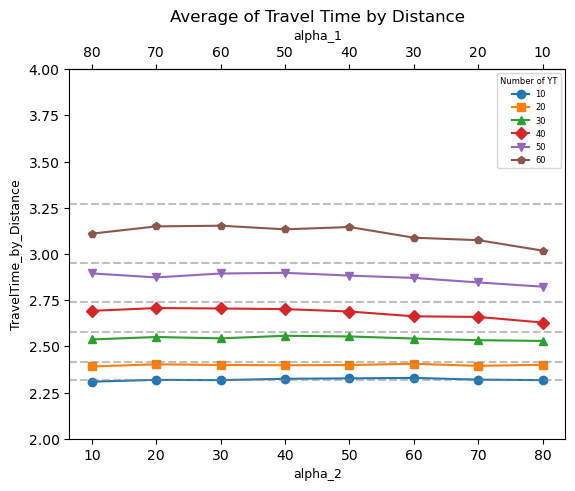

In [ ]:
# Given key_list
key_list = ['prev_5_now_5', 'prev_10_now_10', 'prev_15_now_15', 'prev_20_now_20', 'prev_25_now_25', 'prev_30_now_30']
# key_list = ['prev_5_now_5', 'prev_15_now_15', 'prev_25_now_25', 'prev_30_now_30']


# Initialize an empty list to store the selected DataFrames
selected_dfs = []

# Iterate through travel_df
for key, df in travel_df:
    if key in key_list:
        # Append the matching DataFrame to the selected_dfs list
        selected_dfs.append((key, df))

x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
title = 'Average of Travel Time by Distance'
y_lim = (2, 4)

lineplot_avg(selected_dfs, x_col_1, x_col_2, _y_col[1], y_lim, title)